In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error,classification_report, rand_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from nltk.stem import PorterStemmer
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install hdbscan
import hdbscan



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039272 sha256=b88417ac4d4ec15e741e71cc4287abc8bf6c08fabd2f4771e225570f33a82912
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [ ]:
!pip install umap-learn
import umap.umap_ as umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=bb28e0f96dc0640984a7c088dc6b18a27e8182a0fad559b7a2b2676ea9a59cc8
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from sklearn.datasets import fetch_20newsgroups


In [ ]:
#categories = ['comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware','rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='all',remove = ('headers','footers'), categories=categories, shuffle=True, random_state=42)


# PART 1

## Q1

In [ ]:
vectorizer = TfidfVectorizer(min_df=3, stop_words='english')

# Apply the vectorizer to the data
tfidf_matrix = vectorizer.fit_transform(newsgroups_train.data)

# Report the dimensions of the TF-IDF matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (7882, 23522)


## Q2

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=50)
clusters = kmeans.fit_predict(tfidf_matrix)
contingency_table = metrics.cluster.contingency_matrix(newsgroups_train.target, clusters)


In [ ]:
from plotmat import plot_mat

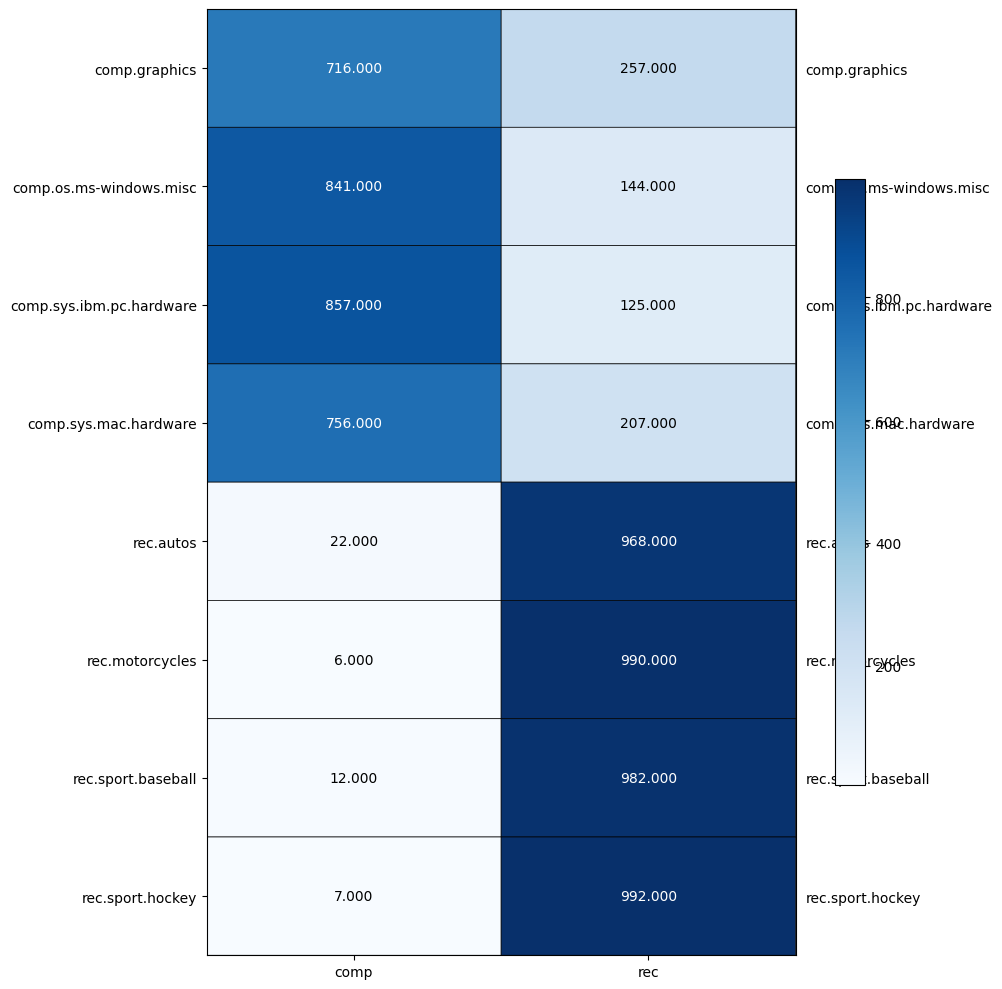

In [ ]:
plot_mat(contingency_table,xticklabels = ('comp','rec'),yticklabels = ('comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware','rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey'),size=(10,10))

Not have to be a square shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Q3

In [ ]:
# Calculate clustering measures
homogeneity = metrics.homogeneity_score(newsgroups_train.target, clusters)
completeness = metrics.completeness_score(newsgroups_train.target, clusters)
v_measure = metrics.v_measure_score(newsgroups_train.target, clusters)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train.target, clusters)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train.target, clusters)
# Print the results
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info Score:", adjusted_mutual_info)

Homogeneity Score: 0.19730483767491303
Completeness Score: 0.606750581896466
V-Measure: 0.29777754656279315
Adjusted Rand Index: 0.15825451820109793
adjusted_mutual_info Score: 0.2975510153798165


##Q4

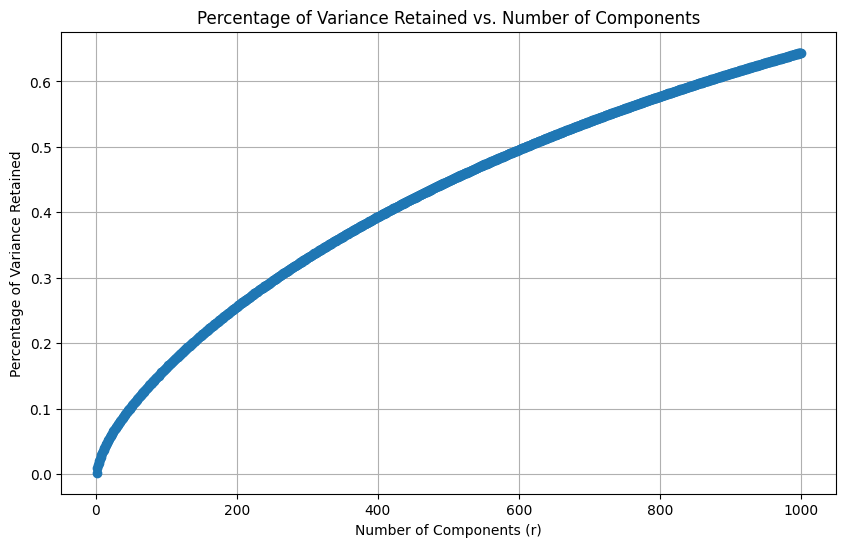

In [ ]:
# Assuming tfidf_matrix is your TF-IDF matrix
num_components = 1000
variance_retained = []

for r in range(1, num_components + 1):
    svd = TruncatedSVD(n_components=r)
    svd.fit(tfidf_matrix)
    variance_retained.append(svd.explained_variance_ratio_.sum())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components + 1), variance_retained, marker='o')
plt.title('Percentage of Variance Retained vs. Number of Components')
plt.xlabel('Number of Components (r)')
plt.ylabel('Percentage of Variance Retained')
plt.grid(True)
plt.show()


##Q5

In [ ]:
r_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
svd_scores = { 'homogeneity': [], 'completeness': [], 'v_measure': [], 'adjusted_rand': [], 'adjusted_mutual_info': [] }
nmf_scores = { 'homogeneity': [], 'completeness': [], 'v_measure': [], 'adjusted_rand': [], 'adjusted_mutual_info': [] }
for r in r_values:
    # Apply SVD
    svd = TruncatedSVD(n_components=r)
    reduced_data_svd = svd.fit_transform(tfidf_matrix)

    # Apply NMF
    nmf = NMF(n_components=r)
    reduced_data_nmf = nmf.fit_transform(tfidf_matrix)

    # Perform K-means clustering
    kmeans_svd = KMeans(n_clusters=2,random_state=0, max_iter=1000, n_init=50)
    kmeans_nmf = KMeans(n_clusters=2,random_state=0, max_iter=1000, n_init=50)

    clusters_svd = kmeans_svd.fit_predict(reduced_data_svd)
    clusters_nmf = kmeans_nmf.fit_predict(reduced_data_nmf)

    # Calculate and store the scores for each method
    for name, scores in [('svd', svd_scores), ('nmf', nmf_scores)]:
        clusters = clusters_svd if name == 'svd' else clusters_nmf
        reduced_data = reduced_data_svd if name == 'svd' else reduced_data_nmf

        scores['homogeneity'].append(metrics.homogeneity_score(newsgroups_train.target, clusters))
        scores['completeness'].append(metrics.completeness_score(newsgroups_train.target, clusters))
        scores['v_measure'].append(metrics.v_measure_score(newsgroups_train.target, clusters))
        scores['adjusted_rand'].append(metrics.adjusted_rand_score(newsgroups_train.target, clusters))
        scores['adjusted_mutual_info'].append(metrics.adjusted_mutual_info_score(newsgroups_train.target, clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
def plot_scores_barchart(scores, title):
    plt.figure(figsize=(12, 8))
    n_scores = len(scores)
    width = 0.15  # width of the bars

    r_positions = range(len(r_values))

    for i, (score_name, values) in enumerate(scores.items()):
        plt.bar([p + width*i for p in r_positions], values, width, label=score_name)

    plt.xlabel('Number of Components (r)')
    plt.ylabel('Score')
    plt.title(title)
    plt.xticks([p + width*(n_scores/2) for p in r_positions], r_values)
    plt.legend()
    plt.grid(True)
    plt.show()


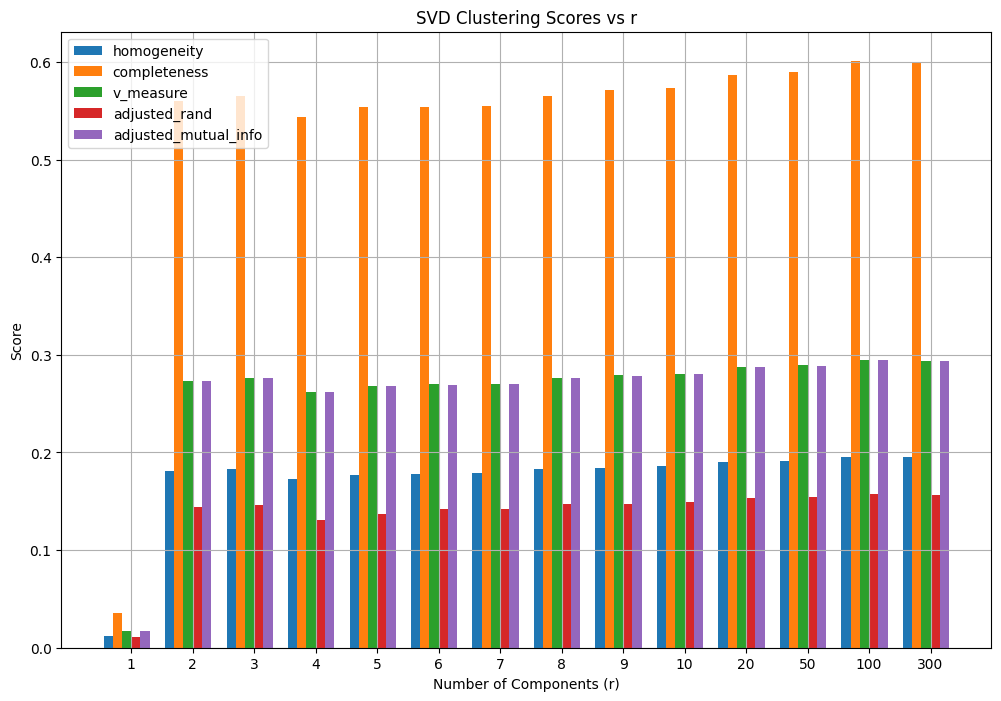

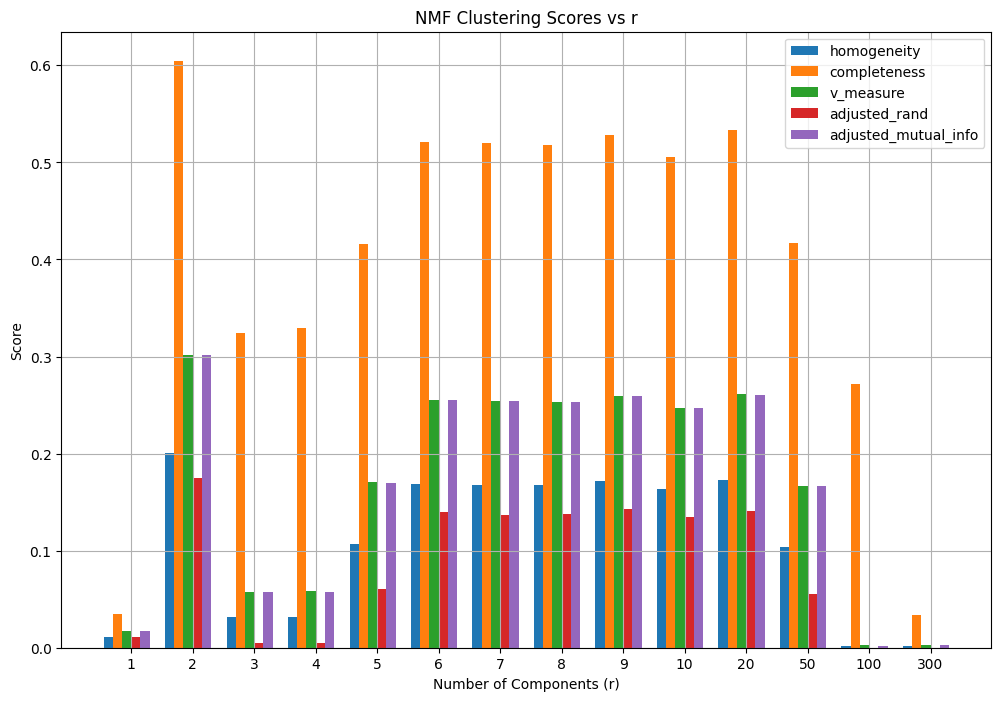

In [ ]:
plot_scores_barchart(svd_scores, 'SVD Clustering Scores vs r')
plot_scores_barchart(nmf_scores, 'NMF Clustering Scores vs r')

For SVD, the best r is 100 because it has the highest 5 measure scores.

For NMF, the best r is 2 because it has the highest 5 measure scores.

##Q6

For SVD:

* SVD reduces dimensions by keeping the most significant singular vectors that explain the most variance in the data. Then we might remove noise and redundant when r=100, which is better than the result with r = 300.

* In very high-dimensional spaces, data points tend to be equidistant from each other, making clustering difficult. Reducing dimensions solves this problem to an extent, but we can't reduce too much making the data too simple.

* There might also a problem of overfitting if r is larger than 100.

For NMF:

* NMF decomposes data into non-negative bases and coefficients. When r is small, NMF might highlight distinct, interpretable features that aid in clustering. When r increases, we may add components that are not generalizable.

##Q7

In [ ]:
q3_svd_nvf_scores = { 'homogeneity': [0.19957166610515142], 'completeness': [0.6102813657879052], 'v_measure': [0.3007826461512907], 'adjusted_rand': [0.1633314394082258], 'adjusted_mutual_info': [0.004832413676527848] }
for key, value in svd_scores.items():
        average = sum(value) / len(value)
        q3_svd_nvf_scores[key].append(average)

for key, value in nmf_scores.items():
        average = sum(value) / len(value)
        q3_svd_nvf_scores[key].append(average)

In [ ]:
'''
Input:
  scores: dictionary with values of list of numbers
  title: name of the graph
  x_val: x axis
Output:
  Bar graph with lables
'''
def plot_multilable_barchart(scores, title, x_val):
    plt.figure(figsize=(12, 8))
    n_scores = len(scores)
    width = 0.15  # width of the bars

    r_positions = range(len(x_val))

    for i, (score_name, values) in enumerate(scores.items()):
        plt.bar([p + width*i for p in r_positions], values, width, label=score_name)

    # plt.xlabel('Number of Components (r)')
    plt.ylabel('Score')
    plt.title(title)
    plt.xticks([p + width*(n_scores/2) for p in r_positions], x_val)
    plt.legend()
    plt.grid(True)
    plt.show()

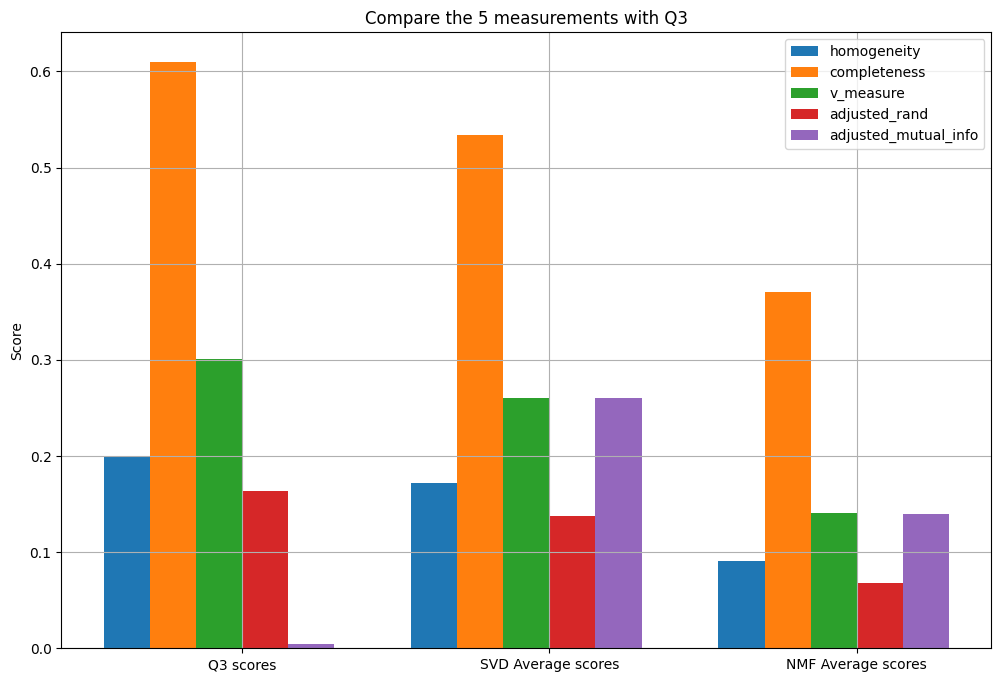

In [ ]:
x_val = ['Q3 scores','SVD Average scores', 'NMF Average scores']
plot_multilable_barchart(q3_svd_nvf_scores, 'Compare the 5 measurements with Q3', x_val)

Not better than Q3

##Q8

The optimal r for SVD is 2, and the optimal r for nmf is 2.



In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
r_svd =100
r_nmf = 2

# Apply SVD
svd = TruncatedSVD(n_components=r_svd)
reduced_data_svd = svd.fit_transform(tfidf_matrix)
kmeans_svd = KMeans(n_clusters=2)
clusters_svd = kmeans_svd.fit_predict(reduced_data_svd)

# Apply NMF
nmf = NMF(n_components=r_nmf)
reduced_data_nmf = nmf.fit_transform(tfidf_matrix)
kmeans_nmf = KMeans(n_clusters=2)
clusters_nmf = kmeans_nmf.fit_predict(reduced_data_nmf)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels = [0 if label<4 else 1 for label in newsgroups_train.target]


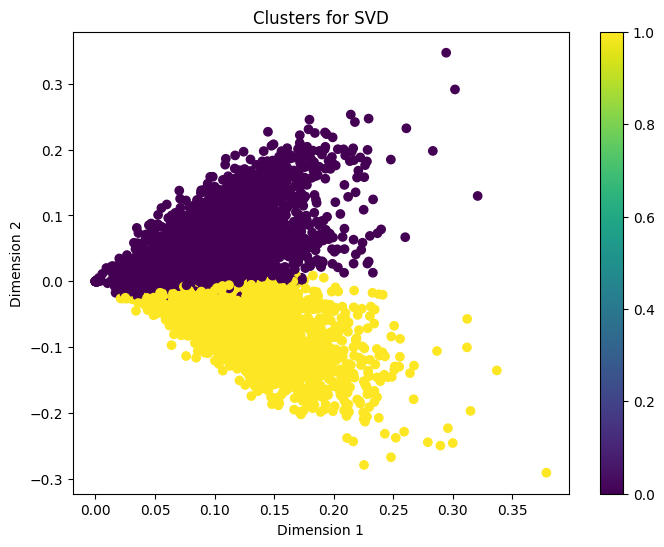

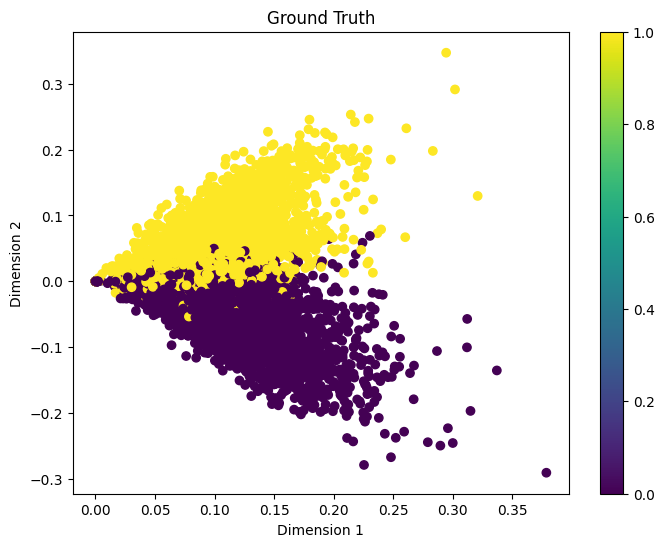

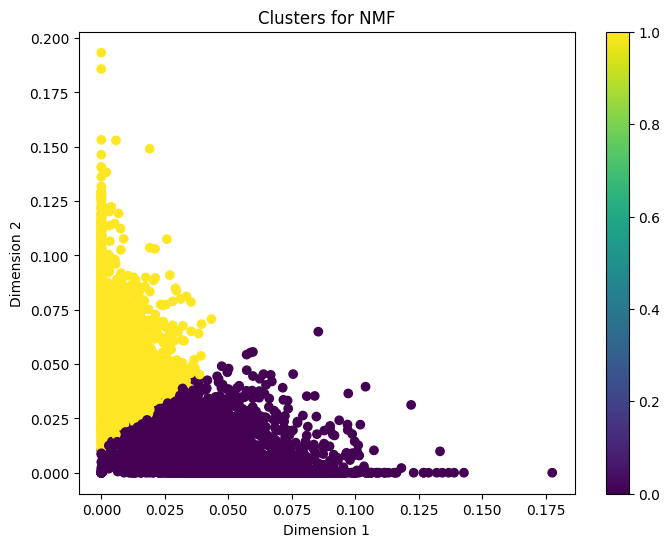

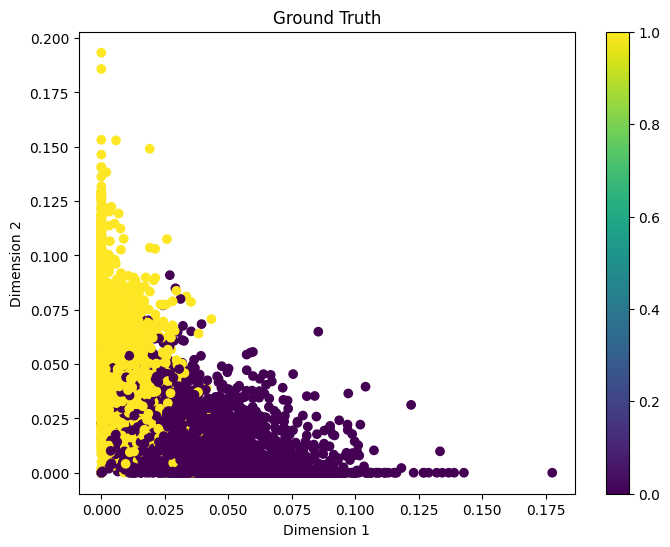

In [ ]:
def plot_clusters(data, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar()
    plt.show()

plot_clusters(reduced_data_svd, clusters_svd, 'Clusters for SVD')
plot_clusters(reduced_data_svd, labels, 'Ground Truth')

plot_clusters(reduced_data_nmf, clusters_nmf, 'Clusters for NMF')
plot_clusters(reduced_data_nmf, labels, 'Ground Truth')

##Q9

For SVD reduction, the cluster formed along the line of y = 0. For data with y > 0, it belongs to group 1 and for data with y < 0, it belongs to group2. However, for NMF, the seperation line is y = x. For data below this line, it belongs to group 1, whereas for data above this line, it belongs to group 2. Such distribution is ideal for 2 clusters k-Means clutsering as clusters are seperated very clearly.

##Q10

In [ ]:
newsgroups_train_20 = fetch_20newsgroups(subset='train',remove=('headers', 'footers'))

In [ ]:
vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
tfidf_matrix_20 = vectorizer.fit_transform(newsgroups_train_20.data)

In [ ]:
nmf = NMF(n_components=2)
reduced_nmf_20 = nmf.fit_transform(tfidf_matrix_20)
svd = TruncatedSVD(n_components=2)
reduced_svd_20 = svd.fit_transform(tfidf_matrix_20)

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=50)
clusters_20_svd = kmeans.fit_predict(reduced_svd_20)
clusters_20_nmf = kmeans.fit_predict(reduced_nmf_20)

contingency_table_svd_20 = metrics.cluster.contingency_matrix(newsgroups_train_20.target, clusters_20_svd)
contingency_table_nmf_20 = metrics.cluster.contingency_matrix(newsgroups_train_20.target, clusters_20_nmf)



In [ ]:
import numpy as np
from plotmat import plot_mat
from sklearn.metrics import confusion_matrix,adjusted_mutual_info_score
from scipy.optimize import linear_sum_assignment


SVD Contingency Matrix

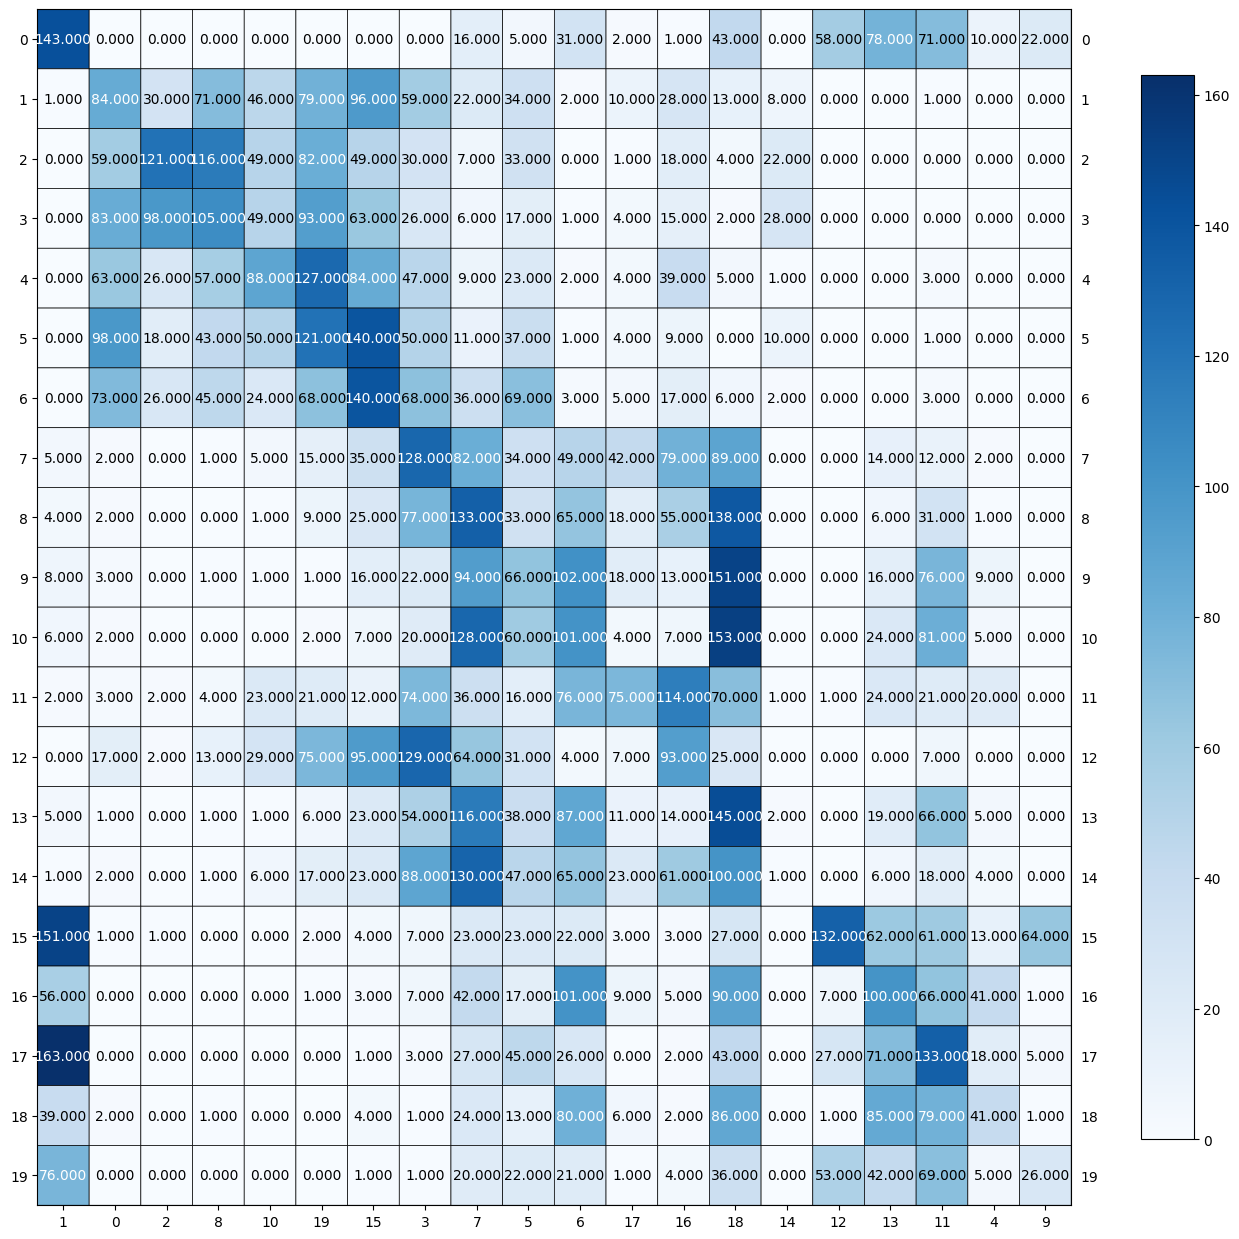

In [ ]:
rows, cols = linear_sum_assignment(contingency_table_svd_20, maximize=True)
plot_mat(contingency_table_svd_20[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(12.5,12.5))

NMF Contingency Matrix

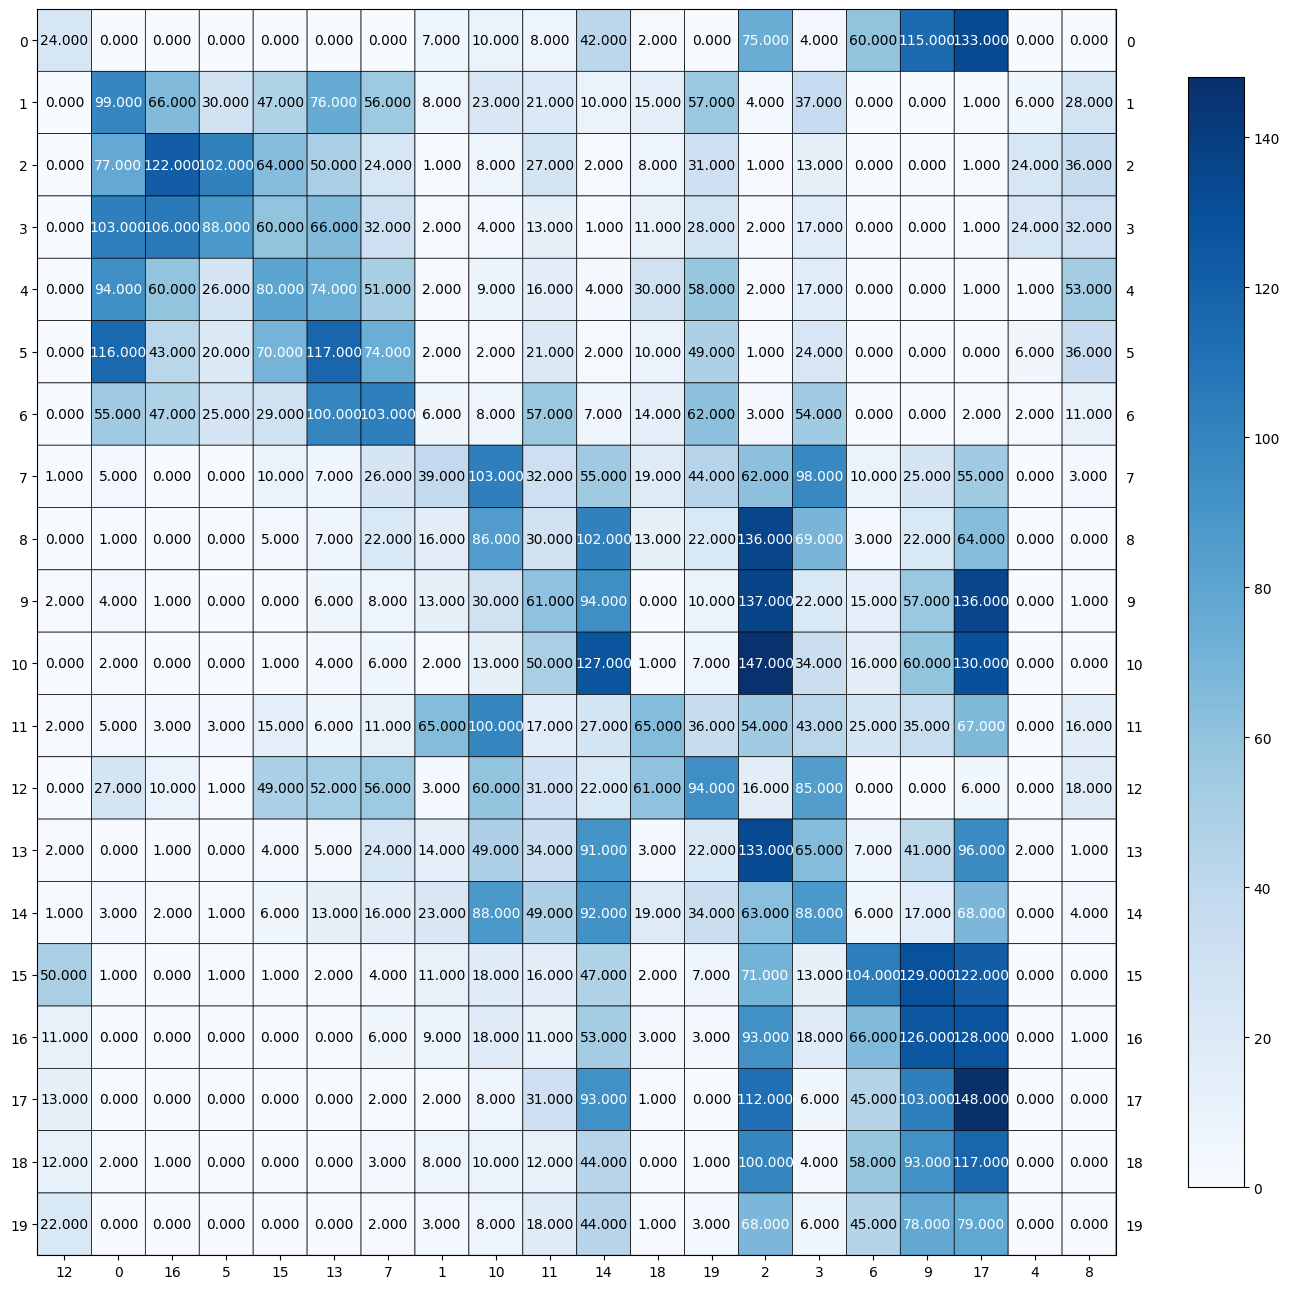

In [ ]:
rows2, cols2 = linear_sum_assignment(contingency_table_nmf_20, maximize=True)
plot_mat(contingency_table_nmf_20[rows2[:, np.newaxis], cols2], xticklabels=cols2, yticklabels=rows2, size=(13,13))

SVD result

In [ ]:
homogeneity = metrics.homogeneity_score(newsgroups_train_20.target, clusters_20_svd)
completeness = metrics.completeness_score(newsgroups_train_20.target, clusters_20_svd)
v_measure = metrics.v_measure_score(newsgroups_train_20.target, clusters_20_svd)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train_20.target, clusters_20_svd)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train_20.target, clusters_20_svd)
# Print the results
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info_score:", adjusted_mutual_info)

Homogeneity Score: 0.2194951023105
Completeness Score: 0.23143971592527415
V-Measure: 0.22530921131563658
Adjusted Rand Index: 0.068294020779942
adjusted_mutual_info_score: 0.22098555088600477


NMF result

In [ ]:
homogeneity = metrics.homogeneity_score(newsgroups_train_20.target, clusters_20_nmf)
completeness = metrics.completeness_score(newsgroups_train_20.target, clusters_20_nmf)
v_measure = metrics.v_measure_score(newsgroups_train_20.target, clusters_20_nmf)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train_20.target, clusters_20_nmf)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train_20.target, clusters_20_nmf)
# Print the results
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info_score:", adjusted_mutual_info)

Homogeneity Score: 0.19347599358057233
Completeness Score: 0.20514679535409133
V-Measure: 0.1991405467162527
Adjusted Rand Index: 0.05634239980530692
adjusted_mutual_info_score: 0.19465746040343232


##Q11

In [ ]:
!pip install umap-learn
import umap.umap_ as umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=3b81cd06fbc6e3ba70b68cbd9f9b347893aef66be4a49d3901b2d2517f9d5e8d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


##N = 5, Cosine

In [ ]:
reducer_5cos= umap.UMAP(n_components=5, metric='cosine')
reduced_data_5cos = reducer_5cos.fit_transform(tfidf_matrix_20)

kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(reduced_data_5cos)

# Calculate metrics
homogeneity = metrics.homogeneity_score(newsgroups_train_20.target, clusters)
completeness = metrics.completeness_score(newsgroups_train_20.target, clusters)
v_measure = metrics.v_measure_score(newsgroups_train_20.target, clusters)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train_20.target, clusters)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train_20.target, clusters)

# Contingency matrix
contingency_matrix = metrics.cluster.contingency_matrix(newsgroups_train_20.target, clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Homogeneity Score: 0.5777382042313857
Completeness Score: 0.593092130030628
V-Measure: 0.5853144936898813
Adjusted Rand Index: 0.4610233868429287
adjusted_mutual_info Score: 0.5830238714052672


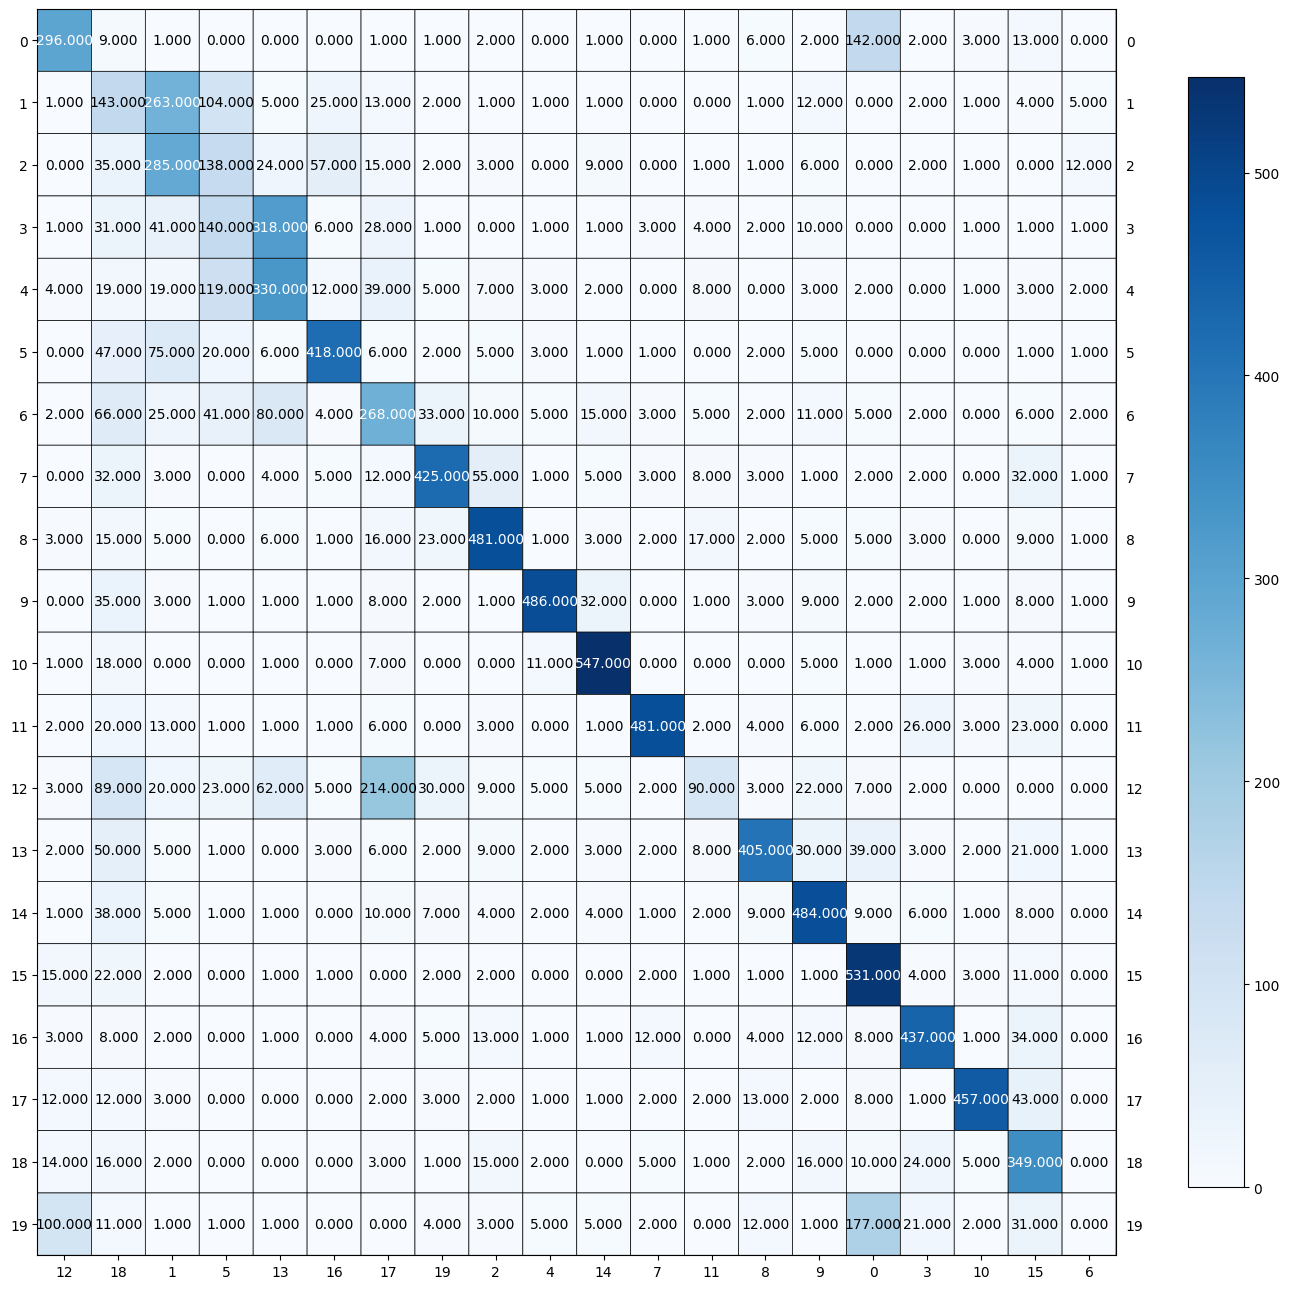

In [ ]:
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info Score:", adjusted_mutual_info)
rows, cols = linear_sum_assignment(contingency_matrix, maximize=True)
plot_mat(contingency_matrix[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(13,13))

##N = 20, Cosine

In [ ]:
reducer_20cos= umap.UMAP(n_components=20, metric='cosine')
reduced_data_20cos = reducer_20cos.fit_transform(tfidf_matrix_20)

kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(reduced_data_20cos)

# Calculate metrics
homogeneity = metrics.homogeneity_score(newsgroups_train_20.target, clusters)
completeness = metrics.completeness_score(newsgroups_train_20.target, clusters)
v_measure = metrics.v_measure_score(newsgroups_train_20.target, clusters)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train_20.target, clusters)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train_20.target, clusters)

# Contingency matrix
contingency_matrix = metrics.cluster.contingency_matrix(newsgroups_train_20.target, clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Homogeneity Score: 0.57149601379895
Completeness Score: 0.5824653325508448
V-Measure: 0.5769285371331393
Adjusted Rand Index: 0.43601298704934194
adjusted_mutual_info Score: 0.5746181083935407


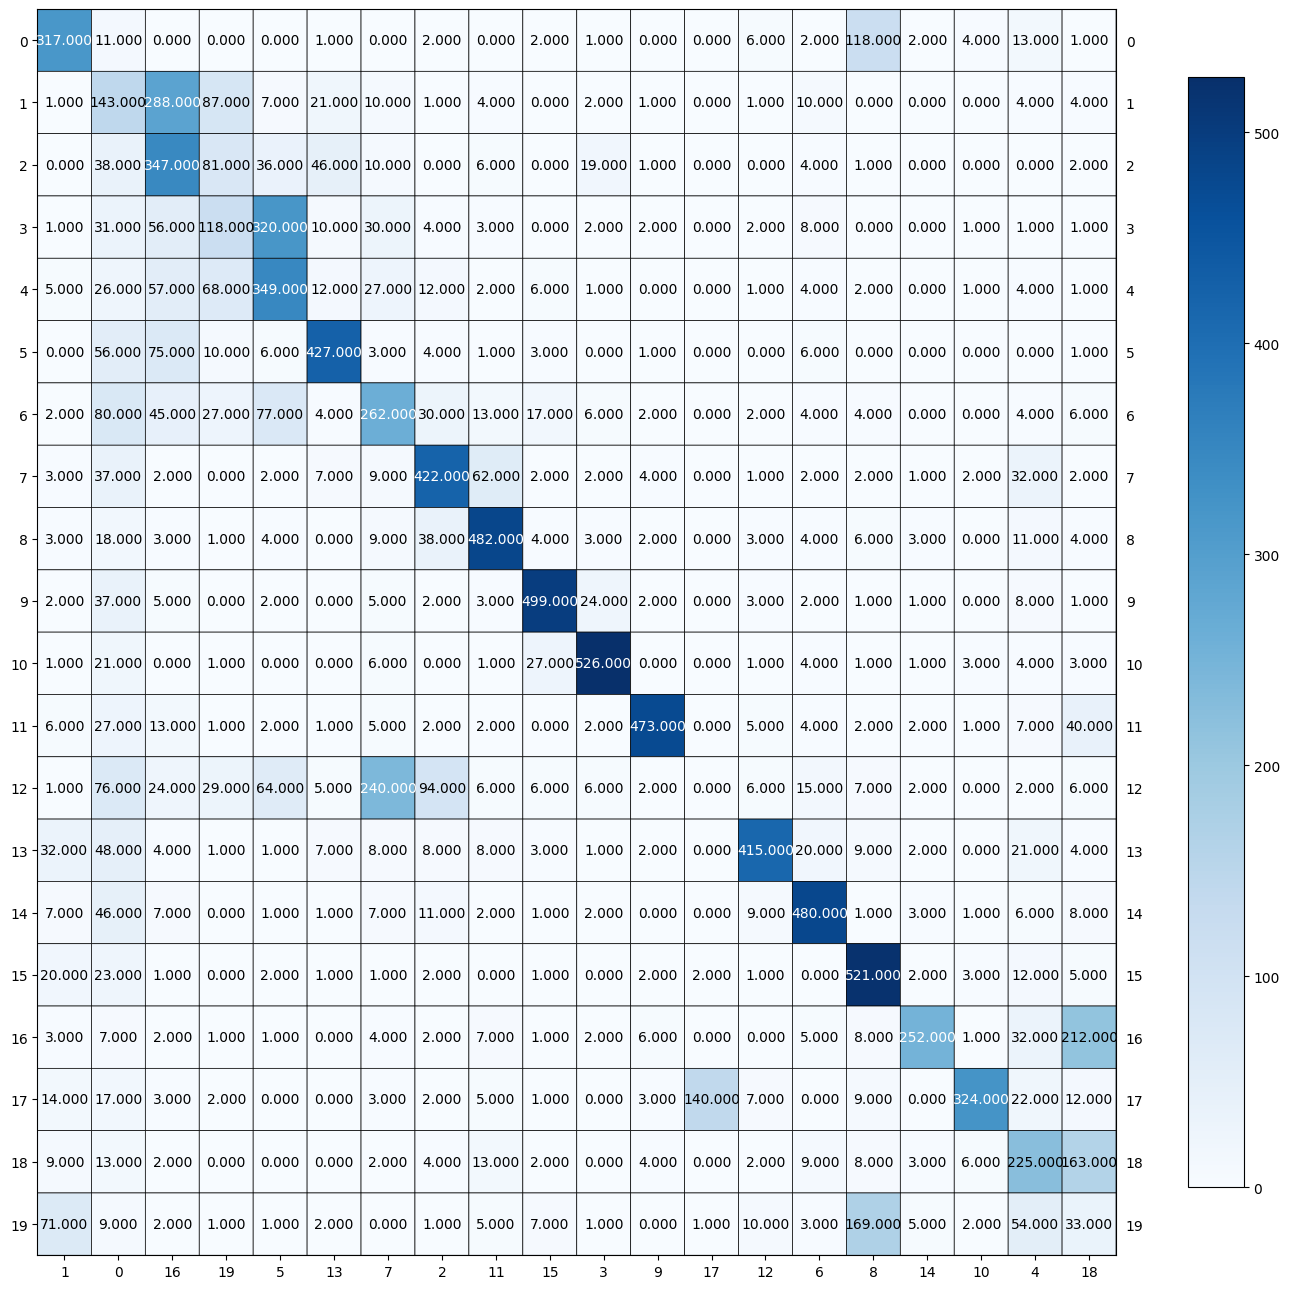

In [ ]:
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info Score:", adjusted_mutual_info)
rows, cols = linear_sum_assignment(contingency_matrix, maximize=True)
plot_mat(contingency_matrix[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(13,13))

##N = 200, Cosine

In [ ]:
reducer_200cos= umap.UMAP(n_components=200, metric='cosine')
reduced_data_200cos = reducer_200cos.fit_transform(tfidf_matrix_20)

kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(reduced_data_200cos)

# Calculate metrics
homogeneity = metrics.homogeneity_score(newsgroups_train_20.target, clusters)
completeness = metrics.completeness_score(newsgroups_train_20.target, clusters)
v_measure = metrics.v_measure_score(newsgroups_train_20.target, clusters)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train_20.target, clusters)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train_20.target, clusters)

# Contingency matrix
contingency_matrix = metrics.cluster.contingency_matrix(newsgroups_train_20.target, clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Homogeneity Score: 0.5703566756893415
Completeness Score: 0.5852438802671409
V-Measure: 0.5777043846096378
Adjusted Rand Index: 0.44005045050428243
adjusted_mutual_info Score: 0.5753896134961639


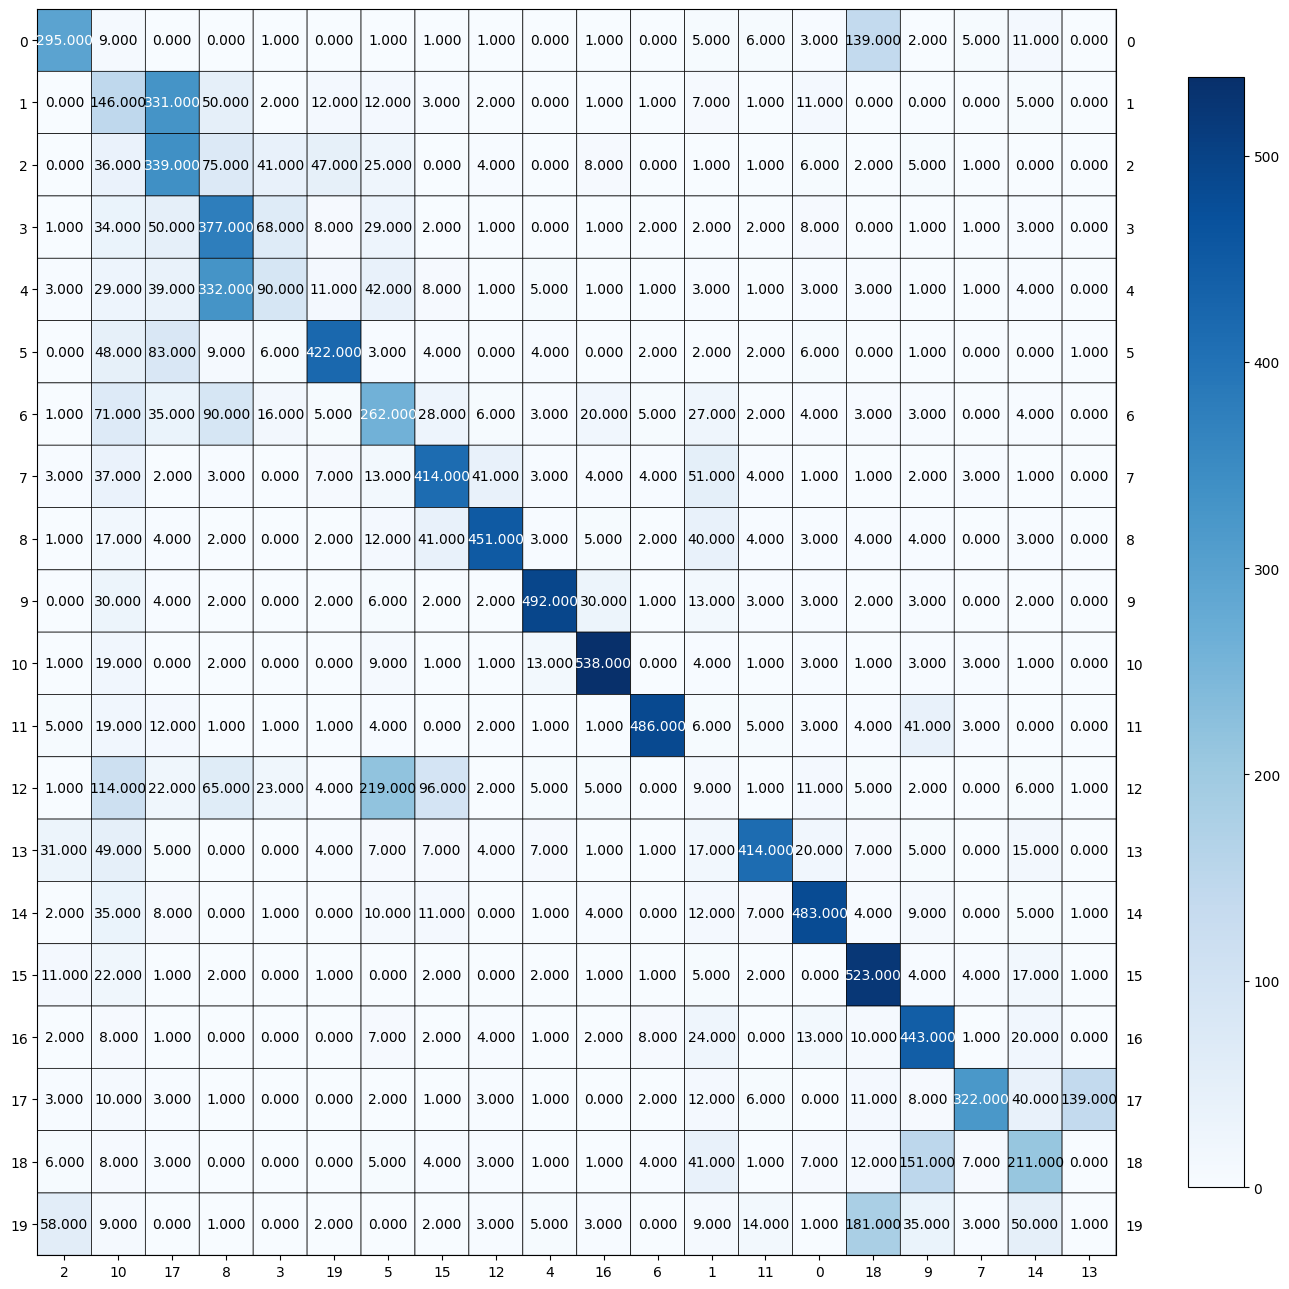

In [ ]:
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info Score:", adjusted_mutual_info)
rows, cols = linear_sum_assignment(contingency_matrix, maximize=True)
plot_mat(contingency_matrix[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(13,13))

##N = 5, Euclidean

In [ ]:
reducer_5sin= umap.UMAP(n_components=5, metric='euclidean')
reduced_data_5sin = reducer_5sin.fit_transform(tfidf_matrix_20)

kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(reduced_data_5sin)

# Calculate metrics
homogeneity = metrics.homogeneity_score(newsgroups_train_20.target, clusters)
completeness = metrics.completeness_score(newsgroups_train_20.target, clusters)
v_measure = metrics.v_measure_score(newsgroups_train_20.target, clusters)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train_20.target, clusters)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train_20.target, clusters)

# Contingency matrix
contingency_matrix = metrics.cluster.contingency_matrix(newsgroups_train_20.target, clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Homogeneity Score: 0.010248264508654013
Completeness Score: 0.010469607712599315
V-Measure: 0.01035775373018215
Adjusted Rand Index: 0.0008169823739122265
adjusted_mutual_info Score: 0.004948715427779438


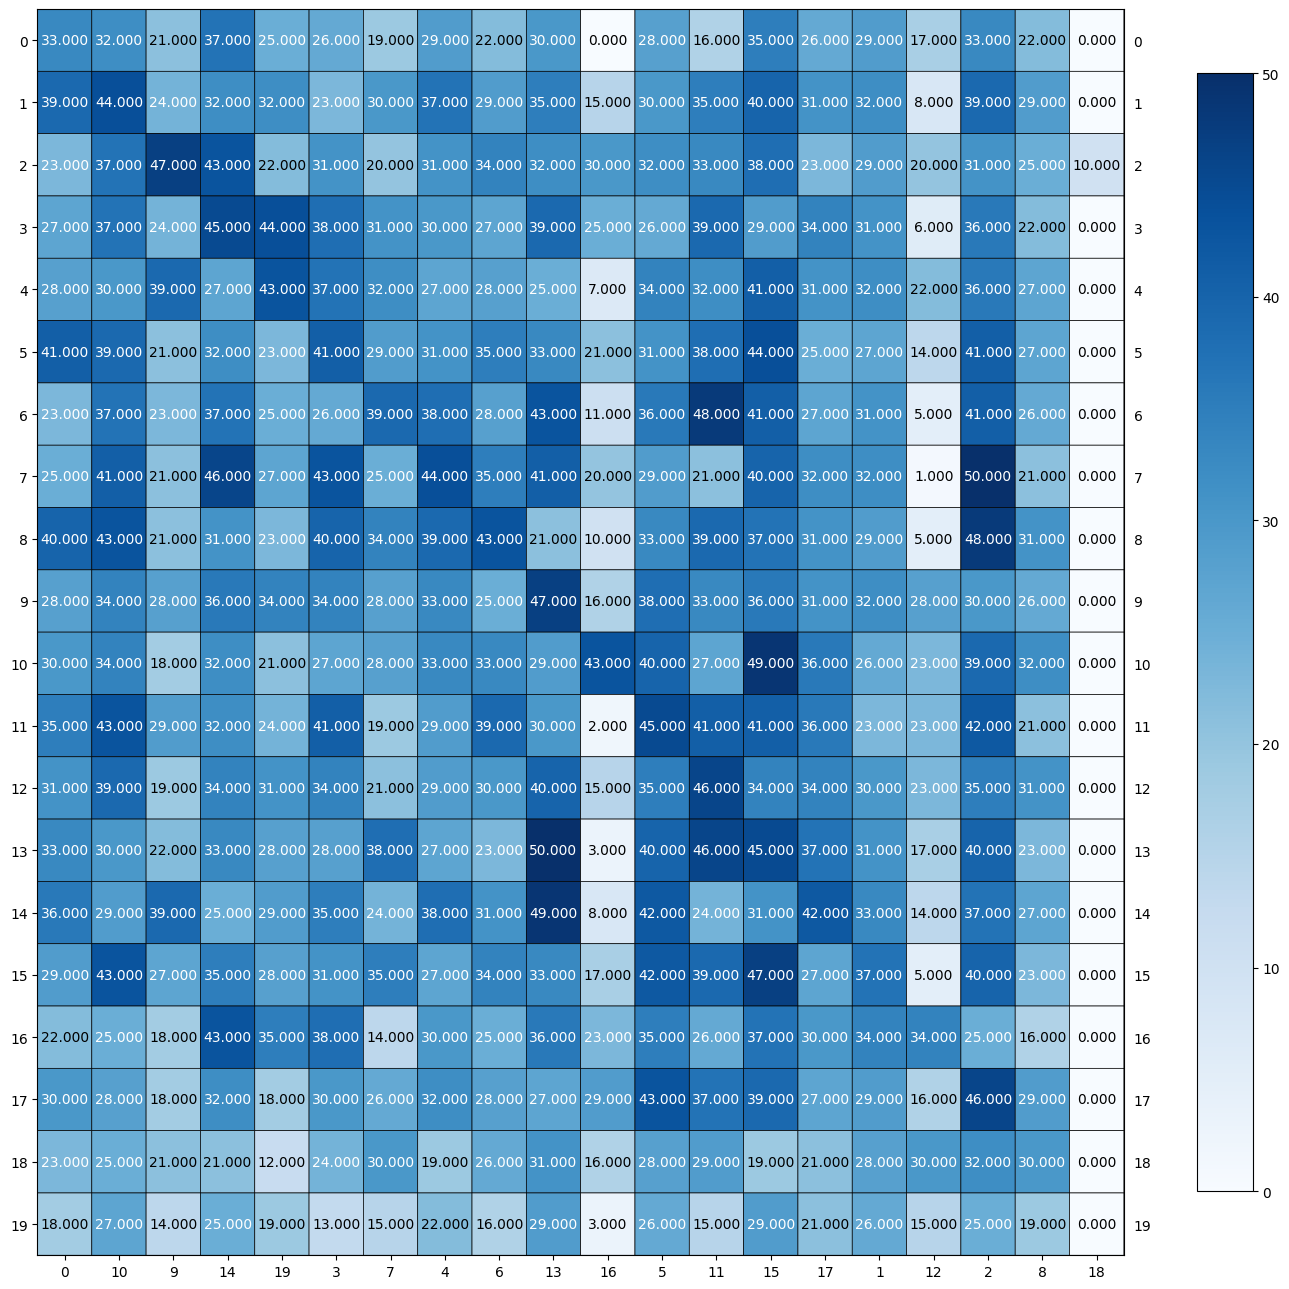

In [ ]:
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info Score:", adjusted_mutual_info)
rows, cols = linear_sum_assignment(contingency_matrix, maximize=True)
plot_mat(contingency_matrix[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(13,13))

##N = 20, Euclidean

In [ ]:
reducer_20euc= umap.UMAP(n_components=20, metric='euclidean')
reduced_data_20euc = reducer_20euc.fit_transform(tfidf_matrix_20)

kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(reduced_data_20euc)

# Calculate metrics
homogeneity = metrics.homogeneity_score(newsgroups_train_20.target, clusters)
completeness = metrics.completeness_score(newsgroups_train_20.target, clusters)
v_measure = metrics.v_measure_score(newsgroups_train_20.target, clusters)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train_20.target, clusters)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train_20.target, clusters)

# Contingency matrix
contingency_matrix = metrics.cluster.contingency_matrix(newsgroups_train_20.target, clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Homogeneity Score: 0.009855531638628349
Completeness Score: 0.010061126599333569
V-Measure: 0.009957267964861568
Adjusted Rand Index: 0.0007974363974100843
adjusted_mutual_info Score: 0.004548222125020799


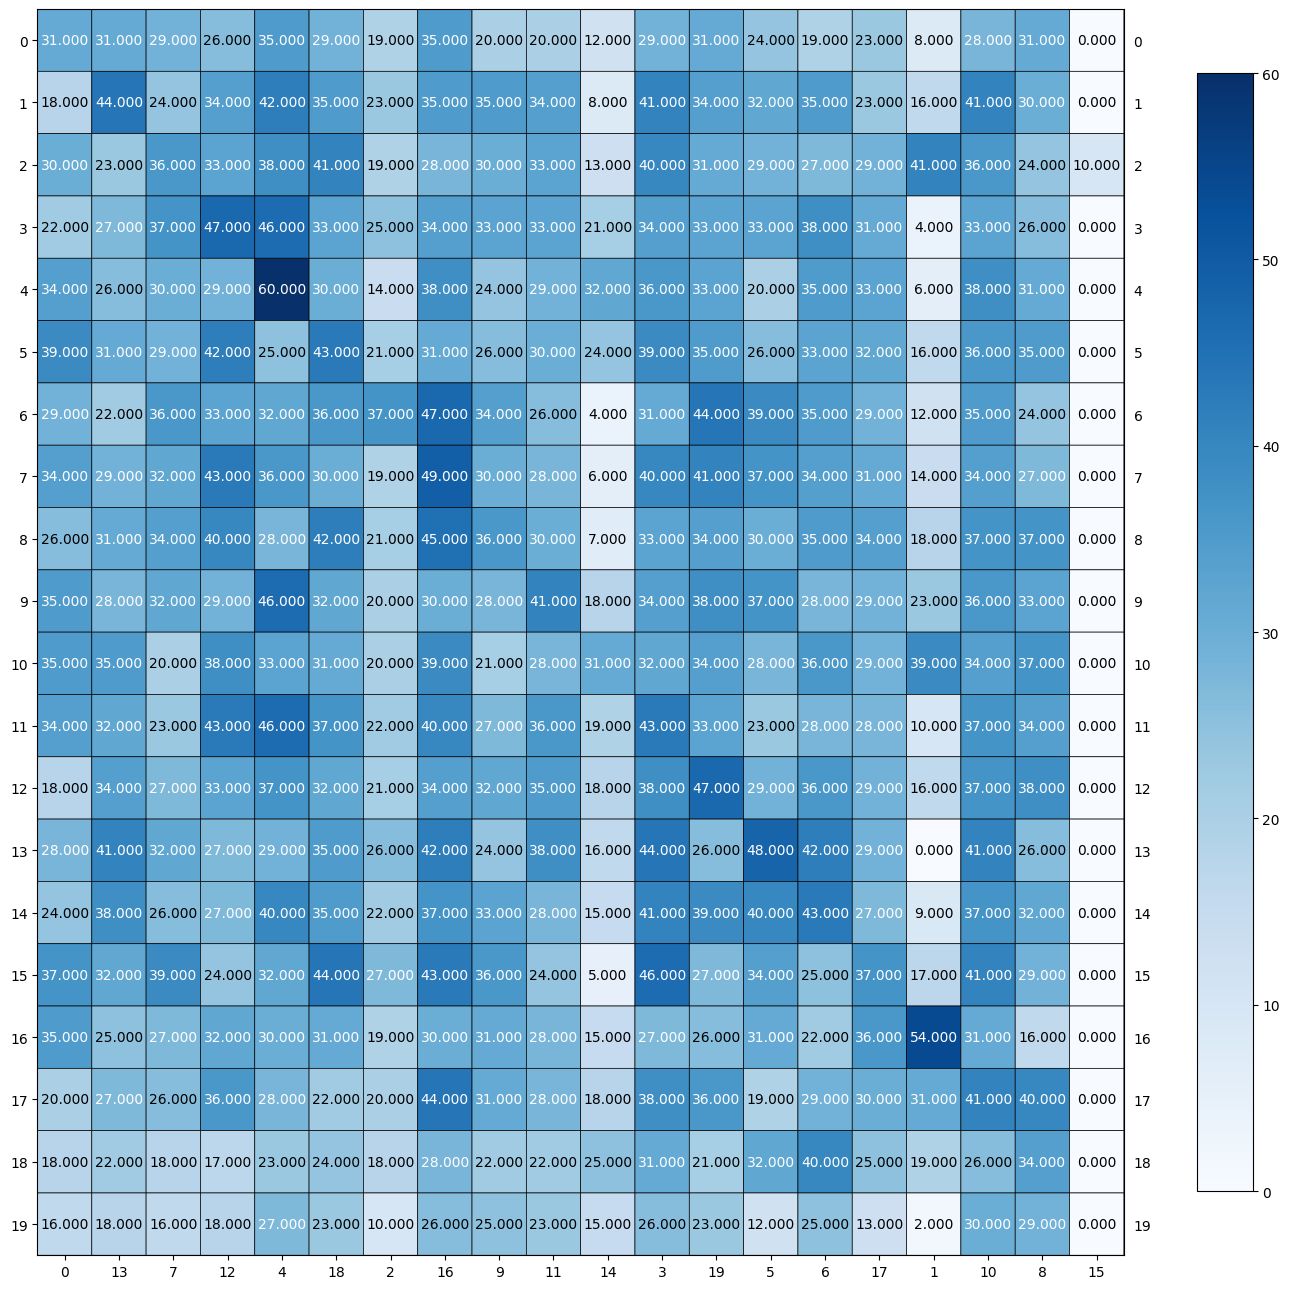

In [ ]:
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info Score:", adjusted_mutual_info)
rows, cols = linear_sum_assignment(contingency_matrix, maximize=True)
plot_mat(contingency_matrix[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(13,13))

##N = 200, Euclidean

In [ ]:
reducer_200euc= umap.UMAP(n_components=200, metric='euclidean')
reduced_data_200euc = reducer_200euc.fit_transform(tfidf_matrix_20)

kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(reduced_data_200euc)

# Calculate metrics
homogeneity = metrics.homogeneity_score(newsgroups_train_20.target, clusters)
completeness = metrics.completeness_score(newsgroups_train_20.target, clusters)
v_measure = metrics.v_measure_score(newsgroups_train_20.target, clusters)
adjusted_rand = metrics.adjusted_rand_score(newsgroups_train_20.target, clusters)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(newsgroups_train_20.target, clusters)

# Contingency matrix
contingency_matrix = metrics.cluster.contingency_matrix(newsgroups_train_20.target, clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Homogeneity Score: 0.010639794582564862
Completeness Score: 0.011093905089517759
V-Measure: 0.010862105674770188
Adjusted Rand Index: 0.0010190354841153266
adjusted_mutual_info Score: 0.0056094597842777155


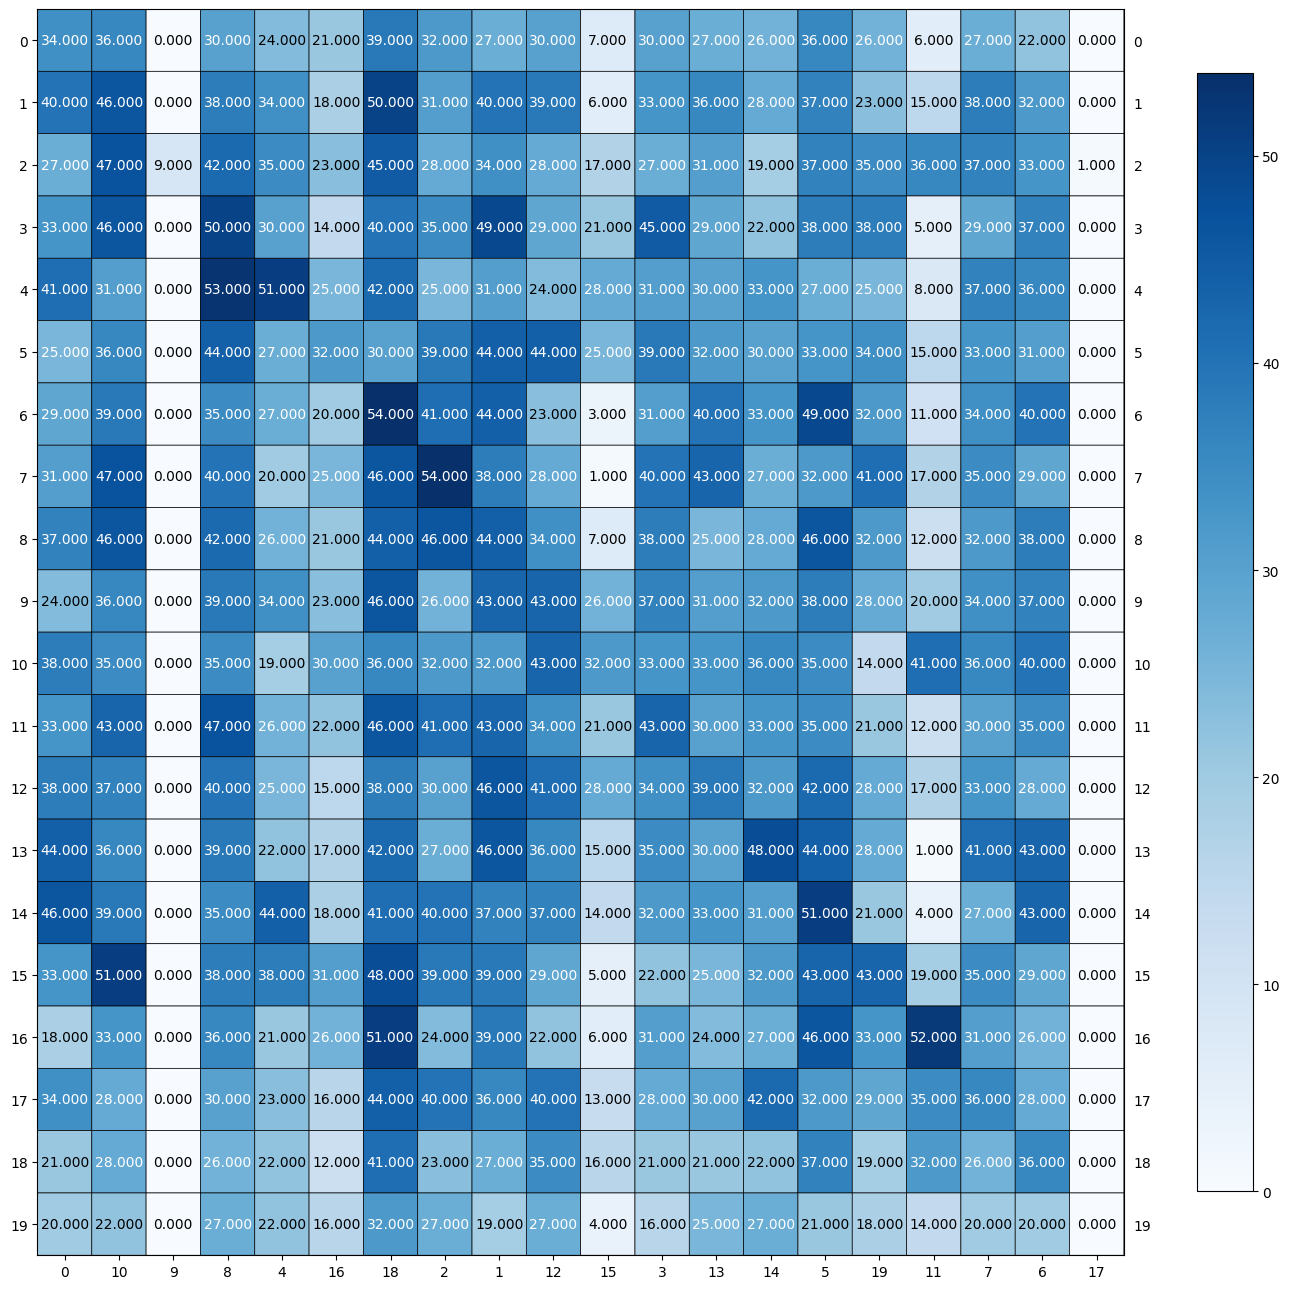

In [ ]:
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)
print("Adjusted Rand Index:", adjusted_rand)
print("adjusted_mutual_info Score:", adjusted_mutual_info)
rows, cols = linear_sum_assignment(contingency_matrix, maximize=True)
plot_mat(contingency_matrix[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(13,13))

##Q12

Based on contingency matrix of different combinations, the setting of n=5,cosine works best, because entries on diagonal are high and the entries off-diagonal are very low comparing to other combinations. For the other combinations, the difference between the entries on the diagonal and the entries off the diagonal is small, and the numbers on the some diagonal entries are low.

In [ ]:
compare_scores = {
'homogeneity': [0.5715217269750034,0.57149601379895,0.5703566756893415, 0.010248264508654013, 0.009855531638628349,0.010639794582564862 ],
'completeness': [0.593478388993104, 0.5824653325508448,0.5852438802671409,0.010469607712599315,0.010061126599333569,0.011093905089517759],
'v_measure': [0.5822931502763337,0.5769285371331393,0.5777043846096378,0.01035775373018215,0.009957267964861568,0.010862105674770188],
'adjusted_rand': [0.4420637269627788,0.43601298704934194,0.44005045050428243,0.0008169823739122265,0.0007974363974100843,0.0010190354841153266],
'adjusted_mutual_info': [0.5799889638003936,0.5746181083935407,0.5753896134961639,0.004948715427779438,0.004548222125020799,0.0056094597842777155]
}

combinations = ['5 Cosine', '20 Cosine', '200 Cosine', '5 Euclidean', '20 Euclidean', '200 Euclidean']

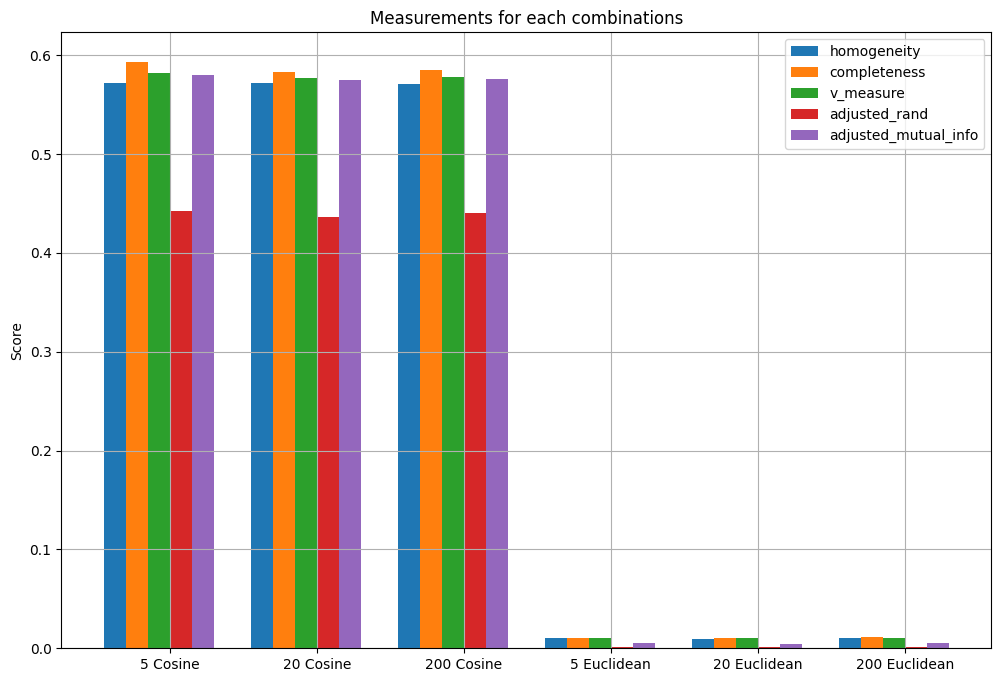

In [ ]:
# plot_multilable_barchart defined in Q7
plot_multilable_barchart(compare_scores, 'Measurements for each combinations', combinations)

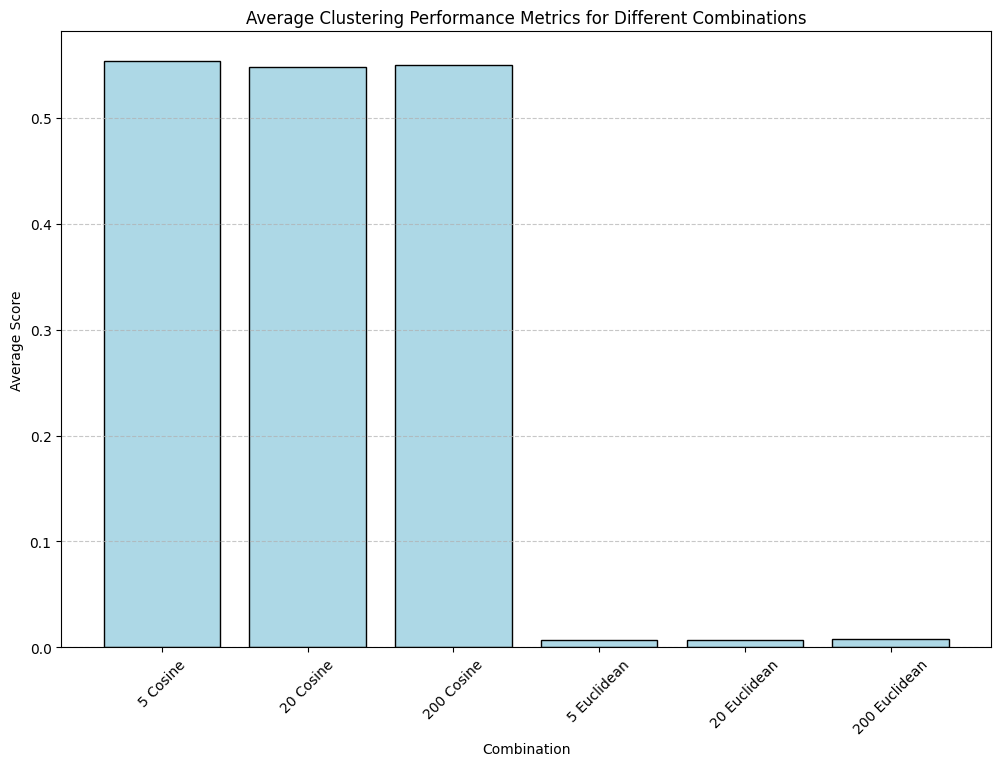

In [ ]:
measurements = ['Homogeneity Score', 'Completeness Score', 'V-Measure', 'Adjusted Rand Index', 'adjusted_mutual_info Score']
scores = [
    [0.5715217269750034, 0.593478388993104, 0.5822931502763337, 0.4420637269627788, 0.5799889638003936],
    [0.57149601379895, 0.5824653325508448, 0.5769285371331393, 0.43601298704934194, 0.5746181083935407],
    [0.5703566756893415, 0.5852438802671409, 0.5777043846096378, 0.44005045050428243, 0.5753896134961639],
    [0.010248264508654013, 0.010469607712599315, 0.01035775373018215, 0.0008169823739122265, 0.004948715427779438],
    [0.009855531638628349, 0.010061126599333569, 0.009957267964861568, 0.0007974363974100843, 0.004548222125020799],
    [0.010639794582564862, 0.011093905089517759, 0.010862105674770188, 0.0010190354841153266, 0.0056094597842777155]
]

# Bar graph for the average score of each combination
average_scores = [sum(combination) / len(combination) for combination in scores]

plt.figure(figsize=(12, 8))
plt.bar(combinations, average_scores, color='lightblue', edgecolor='black')
plt.xlabel('Combination')
plt.ylabel('Average Score')
plt.title('Average Clustering Performance Metrics for Different Combinations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the metrics: N = 5 with Cosine function gives a better result

## Q13

V-Measure:
<br>TFIDF: 0.29777754656279315
<br>umap(5,cos):0.5822931502763337
<br>SVD(2): 0.28
<br>NMF(2):0.305
From these results, it's clear to see umap(5, cos) is much more suitable to the kmeans clustering for it has the highest v-measure.

##Q14

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
# dimension reduction
umap_agglo = umap.UMAP(n_components=5, metric='cosine', random_state=42)
umap_agglo_data = umap_agglo.fit_transform(tfidf_matrix_20)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# Ward
ward_clustering = AgglomerativeClustering(n_clusters=20, linkage='ward')
ward_labels = ward_clustering.fit_predict(umap_agglo_data)

y = newsgroups_train_20.target
ward_metrics = {
    'homogeneity': homogeneity_score(y, ward_labels),
    'completeness': completeness_score(y, ward_labels),
    'v_measure': v_measure_score(y, ward_labels),
    'adjusted_rand': adjusted_rand_score(y, ward_labels),
    'adjusted_mutual_info': adjusted_mutual_info_score(y, ward_labels)
}

ward_metrics

{'homogeneity': 0.5573204456587275,
 'completeness': 0.5719076333884381,
 'v_measure': 0.5645198220444879,
 'adjusted_rand': 0.4329537608782823,
 'adjusted_mutual_info': 0.562134070988274}

In [ ]:
# Single
single_clustering = AgglomerativeClustering(n_clusters=20, linkage='single')
single_labels = single_clustering.fit_predict(umap_agglo_data)

single_metrics = {
    'homogeneity': homogeneity_score(y, single_labels),
    'completeness': completeness_score(y, single_labels),
    'v_measure': v_measure_score(y, single_labels),
    'adjusted_rand': adjusted_rand_score(y, single_labels),
    'adjusted_mutual_info': adjusted_mutual_info_score(y, single_labels)
}

single_metrics

{'homogeneity': 0.02385351506544027,
 'completeness': 0.39631387173552934,
 'v_measure': 0.044998632483412904,
 'adjusted_rand': 0.0006571823239826064,
 'adjusted_mutual_info': 0.037058195765209134}

The 5 clustering evalutation metrics of ward linkage are higher than those of single linkage, so ward linkage performs better.

##Q15

In [ ]:
!pip install hdbscan
import hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039289 sha256=c56ba523d8f264046568acef867031b8d747907e85230d232c213b6241cc123c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [ ]:
min_cluster_sizes = [20, 100, 200]

hdbscan_scores = {}

for size in min_cluster_sizes:
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=size)
    cluster_labels = hdbscan_clusterer.fit_predict(umap_agglo_data)

    homogeneity = homogeneity_score(newsgroups_train_20.target, cluster_labels)
    completeness = completeness_score(newsgroups_train_20.target, cluster_labels)
    v_measure = v_measure_score(newsgroups_train_20.target, cluster_labels)
    adjusted_rand = adjusted_rand_score(newsgroups_train_20.target, cluster_labels)
    adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_train_20.target, cluster_labels)

    hdbscan_scores[size] = {
        'homogeneity': homogeneity,
        'completeness': completeness,
        'v_measure': v_measure,
        'adjusted_rand': adjusted_rand,
        'adjusted_mutual_info': adjusted_mutual_info
    }

for size, scores in hdbscan_scores.items():
    print(f"Results for min_cluster_size = {size}:")
    for metric, score in scores.items():
        print(f"{metric}: {score}")
    print()

Results for min_cluster_size = 20:
homogeneity: 0.45949896633140996
completeness: 0.4861843346914141
v_measure: 0.4724651455632233
adjusted_rand: 0.11429195362750086
adjusted_mutual_info: 0.46118947793025944

Results for min_cluster_size = 100:
homogeneity: 0.41518577794395894
completeness: 0.6074751314710624
v_measure: 0.49325251942150194
adjusted_rand: 0.2058364456355361
adjusted_mutual_info: 0.4915413911795486

Results for min_cluster_size = 200:
homogeneity: 0.3238109208422565
completeness: 0.6017578937844139
v_measure: 0.4210508708399455
adjusted_rand: 0.13119346034153737
adjusted_mutual_info: 0.41955719816303283



In [ ]:
for size, scores in hdbscan_scores.items():
    print(f"Average scores for min_cluster_size = {size}:")
    total_values = 0
    for metric, score in scores.items():
        total_values += score
    average_scores = total_values / 5
    print(f"{average_scores}")
    print()

Average scores for min_cluster_size = 20:
0.3987259756287615

Average scores for min_cluster_size = 100:
0.44265825313032153

Average scores for min_cluster_size = 200:
0.37947406879423723



In [ ]:
hdbscan_scores

{20: {'homogeneity': 0.45949896633140996,
  'completeness': 0.4861843346914141,
  'v_measure': 0.4724651455632233,
  'adjusted_rand': 0.11429195362750086,
  'adjusted_mutual_info': 0.46118947793025944},
 100: {'homogeneity': 0.41518577794395894,
  'completeness': 0.6074751314710624,
  'v_measure': 0.49325251942150194,
  'adjusted_rand': 0.2058364456355361,
  'adjusted_mutual_info': 0.4915413911795486},
 200: {'homogeneity': 0.3238109208422565,
  'completeness': 0.6017578937844139,
  'v_measure': 0.4210508708399455,
  'adjusted_rand': 0.13119346034153737,
  'adjusted_mutual_info': 0.41955719816303283}}

## Q16

In [ ]:
best_size = 100
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=best_size)
hdbscan_cluster_labels = hdbscan_clusterer.fit_predict(umap_agglo_data)

In [ ]:
contingency_matrix = metrics.cluster.contingency_matrix(newsgroups_train_20.target, hdbscan_cluster_labels)
rows, cols = linear_sum_assignment(contingency_matrix, maximize=True)

In [ ]:
# modify column names if label -1 exists in hdbscan cluster labels
col_names = cols
if max(np.unique(hdbscan_cluster_labels)) < max(col_names):
  for i in np.unique(hdbscan_cluster_labels):
    index = np.where(col_names == i+1)
    col_names[index] = i

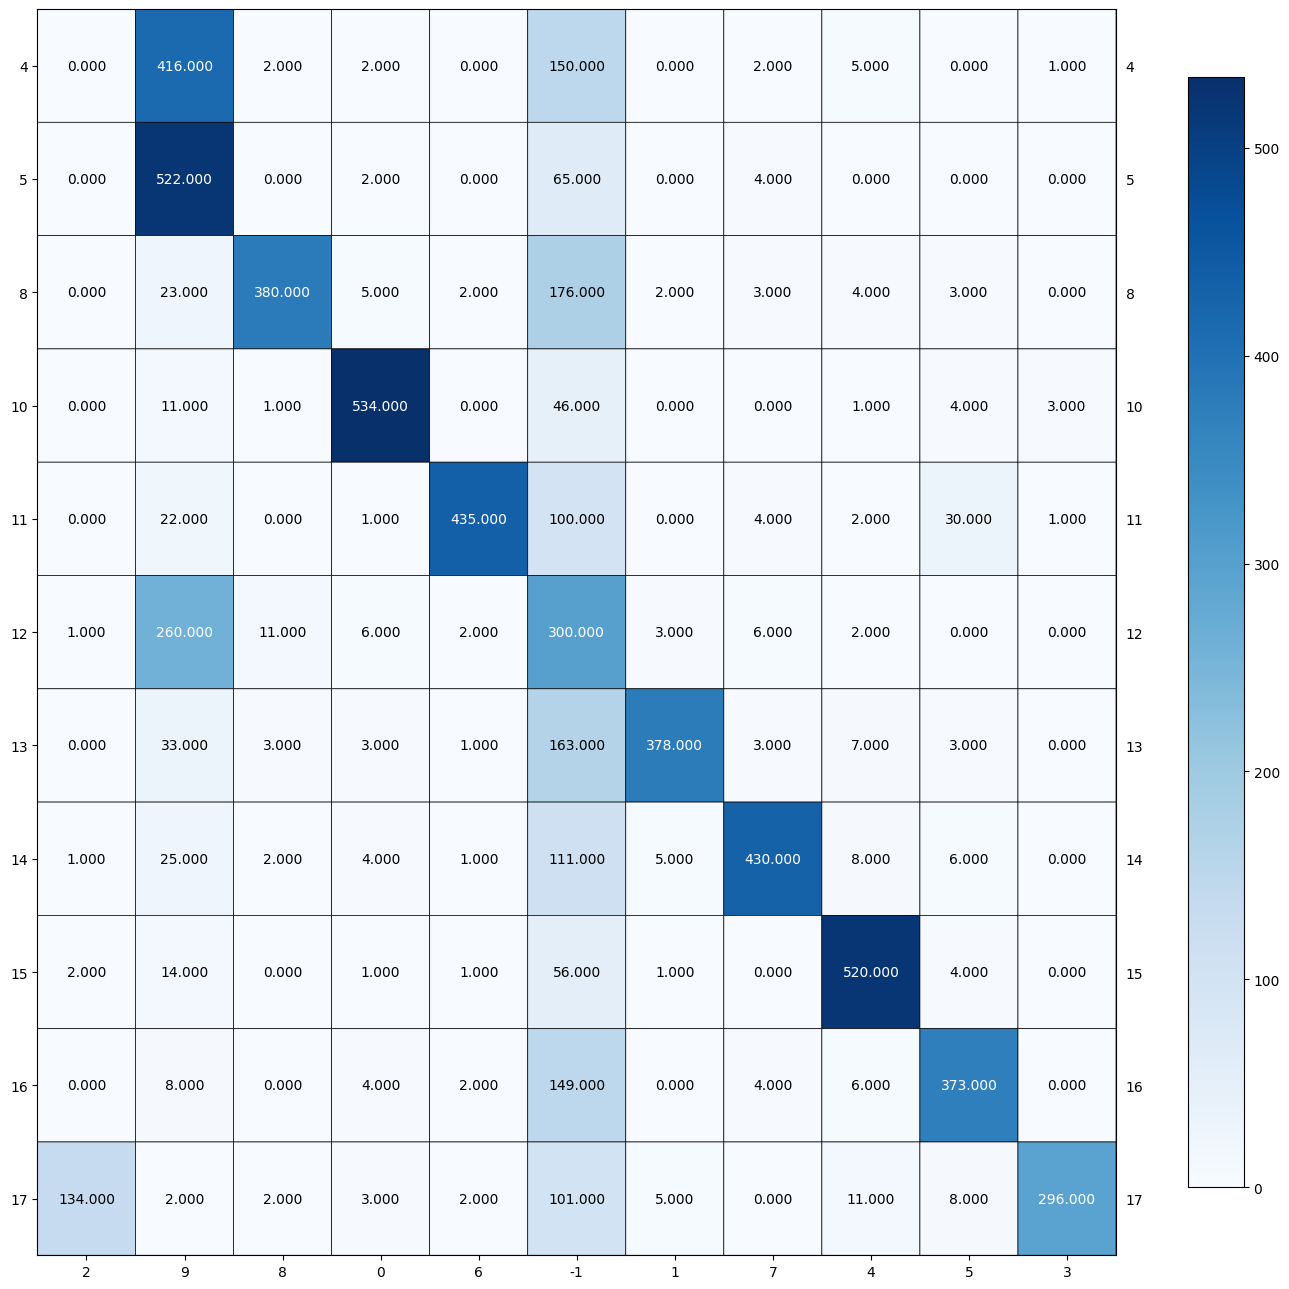

In [ ]:
plot_mat(contingency_matrix[rows[:, np.newaxis], cols], xticklabels=col_names, yticklabels=rows, size=(13,13))

11 clusters are given.

-1 means that HDBSCAN thinks this group of data is outliers or noise, or min_cluster_size parameter is too high, causing many points not to be included in any cluster. We can see this in the matrix in column -1 that there are not low numbers of data under all true data labels are identified as outliers or noise.

This contingency matrix shows that the hdbscan with this umap method gives not bad clustering result. Except for the -1 colunms the diagonal entries have the a high value except of the first entry (1,1) because the clustering label 9 include much data both from data label 1 and 2. In general, the other off diagonal entries values are low

## Q17

In [ ]:
newsgroups_train_20 = fetch_20newsgroups(subset='train',remove=('headers', 'footers'))

In [ ]:
vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
tfidf_matrix_20 = vectorizer.fit_transform(newsgroups_train_20.data)

In [ ]:
best_com_red = {}

### None Dimension reduction

In [ ]:
max_none_red_scores = {}

In [ ]:
def best_k_means(ori_data, k_sizes):
  max_score = float('-inf')
  best_k_size = 0

  for c_size in k_sizes:
    kmeans = KMeans(n_clusters=c_size, random_state=0, max_iter=1000, n_init=50)
    k_clusters = kmeans.fit_predict(ori_data)

    homogeneity = homogeneity_score(newsgroups_train_20.target, k_clusters)
    completeness = completeness_score(newsgroups_train_20.target, k_clusters)
    v_measure = v_measure_score(newsgroups_train_20.target, k_clusters)
    adjusted_rand = adjusted_rand_score(newsgroups_train_20.target, k_clusters)
    adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_train_20.target, k_clusters)

    k_ave_score = (homogeneity + completeness + v_measure + adjusted_rand + adjusted_mutual_info) / 5

    if k_ave_score > max_score:
      max_score = k_ave_score
      best_k_size = c_size
  return max_score, best_k_size

In [ ]:
k_sizes = [10,20,50]
max_none_red_scores['k-means'] = best_k_means(tfidf_matrix_20, k_sizes)

In [ ]:
max_none_red_scores

{'k-means': (0.3577306137546721, 50)}

In [ ]:
# Agglomerative Clustering
from scipy import sparse as sp
def best_agglo_clus(ori_data, n_cluster, linkage_name):
  max_score = float('-inf')
  best_n_cluster = 0

  if sp.issparse(ori_data):
    ori_data = ori_data.toarray()

  for c_size in n_cluster:
    agglo_clustering = AgglomerativeClustering(n_clusters=c_size, linkage=linkage_name)
    agglo_labels = agglo_clustering.fit_predict(ori_data)

    homogeneity = homogeneity_score(newsgroups_train_20.target, agglo_labels)
    completeness = completeness_score(newsgroups_train_20.target, agglo_labels)
    v_measure = v_measure_score(newsgroups_train_20.target, agglo_labels)
    adjusted_rand = adjusted_rand_score(newsgroups_train_20.target, agglo_labels)
    adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_train_20.target, agglo_labels)

    ave_score = (homogeneity + completeness + v_measure + adjusted_rand + adjusted_mutual_info) / 5

    if ave_score > max_score:
      max_score = ave_score
      best_n_cluster = c_size

  return max_score, best_n_cluster

In [ ]:
n_cluster = [20]
max_none_red_scores['Agglomerative Clustering'] = best_agglo_clus(tfidf_matrix_20, n_cluster, 'ward')

In [ ]:
#hdbscan
def best_hdbscan_clus(ori_data, n_cluster):
  max_score = float('-inf')
  best_n_cluster = 0

  for c_size in n_cluster:
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size = c_size)
    hdbscan_cluster_labels = hdbscan_clusterer.fit_predict(ori_data)

    homogeneity = homogeneity_score(newsgroups_train_20.target, hdbscan_cluster_labels)
    completeness = completeness_score(newsgroups_train_20.target, hdbscan_cluster_labels)
    v_measure = v_measure_score(newsgroups_train_20.target, hdbscan_cluster_labels)
    adjusted_rand = adjusted_rand_score(newsgroups_train_20.target, hdbscan_cluster_labels)
    adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_train_20.target, hdbscan_cluster_labels)

    ave_score = (homogeneity + completeness + v_measure + adjusted_rand + adjusted_mutual_info) / 5
    print(f'the average score of hdb with cluster size {c_size} is {ave_score}')

    if ave_score > max_score:
      max_score = ave_score
      best_n_cluster = c_size

  return max_score, best_n_cluster

In [ ]:
n_cluster = [100,200]
max_none_red_scores['HDBSCAN'] = best_hdbscan_clus(tfidf_matrix_20, n_cluster)

In [ ]:
max_none_red_scores

{'k-means': (0.3577306137546721, 50),
 'Agglomerative Clustering': (0.3696000752808358, 20),
 'HDBSCAN': (0.2, 100)}

In [ ]:
# np.save('output.pickle', max_none_red_scores)

In [ ]:
def best_clus(max_red_scores):
  '''
  Input:
    red_name = string of the name of the dimension reduction
    max_red_scores = the dictionary which stores the cluster names(three key)
      with their best average value and their best n_clusters (three tuples)
  Output: None
    Find the best methods and add it to best_com_red which stores the best
    combination with each dimension method
  '''
  best_key = ' '
  max_score = float('-inf')

  for key in max_red_scores:
    result = max_red_scores[key][0]
    if result > max_score:
      max_score = result
      best_key = key
  return best_key


In [ ]:
best_com_red['No reduction, ' + best_clus(max_none_red_scores)] = max_none_red_scores[best_clus(max_none_red_scores)]

In [ ]:
best_com_red

{'No reduction, Agglomerative Clustering': (0.3696000752808358, 20)}

### SVD

In [ ]:
max_svd_scores = {}

In [ ]:
# Apply SVD
svdr5 = TruncatedSVD(n_components=5)
svdr5_tfidf_matrix_20 = svdr5.fit_transform(tfidf_matrix_20)

svdr20 = TruncatedSVD(n_components=20)
svdr20_tfidf_matrix_20 = svdr20.fit_transform(tfidf_matrix_20)

svdr200 = TruncatedSVD(n_components=200)
svdr200_tfidf_matrix_20 = svdr200.fit_transform(tfidf_matrix_20)

In [ ]:
# The matrices after svd with r = 5,20,200
svd_tfidf_matrix_20 = [svdr5_tfidf_matrix_20, svdr20_tfidf_matrix_20, svdr200_tfidf_matrix_20]

K-Means

In [ ]:
# K-Means
# For each r of SVD, find the best k_size and store in max_svd_kmeans_scores
max_svd_kmeans_scores = {}

k_sizes = [10,20,50]
r_size = [5,20,200]
for i in range(len(svd_tfidf_matrix_20)):
  max_svd_kmeans_scores[f'SVD r = {r_size[i]}, k-means'] = best_k_means(svd_tfidf_matrix_20[i], k_sizes)

In [ ]:
max_svd_kmeans_scores

{'SVD r = 5, k-means': (0.28687685673379537, 20),
 'SVD r = 20, k-means': (0.3504656218437012, 50),
 'SVD r = 200, k-means': (0.35133749694643585, 50)}

In [ ]:
# Find the best k-means svd combination and store in max_svd_scores
best_key = best_clus(max_svd_kmeans_scores)
max_svd_scores[best_key] = max_svd_kmeans_scores[best_key]

In [ ]:
max_svd_scores

{'SVD r = 200, k-means': (0.35133749694643585, 50)}

Agglomerative Clustering

In [ ]:
# Agglomerative Clustering (AC)
# For each r of SVD, find the best n_clusters and store in max_svd_ac_scores
max_svd_ac_scores = {}

k_sizes = [20]
r_size = [5,20,200]
for i in range(len(svd_tfidf_matrix_20)):
  max_svd_ac_scores[f'SVD r = {r_size[i]}, Agglomerative Clustering'] = best_agglo_clus(svd_tfidf_matrix_20[i], k_sizes, 'ward')

In [ ]:
max_svd_ac_scores

{'SVD r = 5, Agglomerative Clustering': (0.27723299904605014, 20),
 'SVD r = 20, Agglomerative Clustering': (0.34559580315319555, 20),
 'SVD r = 200, Agglomerative Clustering': (0.3485153986803185, 20)}

In [ ]:
# Find the best AC svd combination and store in max_svd_scores
best_key = best_clus(max_svd_ac_scores)
max_svd_scores[best_key] = max_svd_ac_scores[best_key]

In [ ]:
max_svd_scores

{'SVD r = 200, k-means': (0.35133749694643585, 50),
 'SVD r = 200, Agglomerative Clustering': (0.3485153986803185, 20)}

HDBSCAN

In [ ]:
# HDBSCAN
# For each r of SVD, find the best n_clusters and store in max_svd_hdb_scores
max_svd_hdb_scores = {}

k_sizes = [100,200]
r_size = [5,20,200]
for i in range(len(svd_tfidf_matrix_20)):
  max_svd_hdb_scores[f'SVD r = {r_size[i]}, HDBSCAN'] = best_hdbscan_clus(svd_tfidf_matrix_20[i], k_sizes)

In [ ]:
max_svd_hdb_scores

{'SVD r = 5, HDBSCAN': (0.2, 100),
 'SVD r = 20, HDBSCAN': (0.2, 100),
 'SVD r = 200, HDBSCAN': (0.2, 100)}

In [ ]:
# Find the best HDB svd combination and store in max_svd_scores
best_key = best_clus(max_svd_hdb_scores)
max_svd_scores[best_key] = max_svd_hdb_scores[best_key]

In [ ]:
max_svd_scores

{'SVD r = 200, k-means': (0.35133749694643585, 50),
 'SVD r = 200, Agglomerative Clustering': (0.3485153986803185, 20),
 'SVD r = 5, HDBSCAN': (0.2, 100)}

In [ ]:
# Find the best combination in max_svd_scores and store in best_com_red
best_key = best_clus(max_svd_scores)
best_com_red[best_key] = max_svd_scores[best_key]
best_com_red

{'No reduction, Agglomerative Clustering': (0.3696000752808358, 20),
 'SVD r = 200, k-means': (0.35133749694643585, 50)}

In [ ]:
# {'No reduction, Agglomerative Clustering': (0.3696000752808358, 20),
#  'SVD r = 200, k-means': (0.35133749694643585, 50)}

### NMF

In [ ]:
max_nmf_scores = {}

In [ ]:
# Apply NMF
nmfr5 = NMF(n_components=5)
nmfr5_tfidf_matrix_20 = nmfr5.fit_transform(tfidf_matrix_20)

nmfr20 = NMF(n_components=20)
nmfr20_tfidf_matrix_20 = nmfr20.fit_transform(tfidf_matrix_20)

nmfr200 = NMF(n_components=200)
nmfr200_tfidf_matrix_20 = nmfr200.fit_transform(tfidf_matrix_20)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
nmf_tfidf_matrix_20 = [nmfr5_tfidf_matrix_20, nmfr20_tfidf_matrix_20, nmfr200_tfidf_matrix_20]

K-Means

In [ ]:
# K-Means
# For each r of NMF, find the best k_size and store in max_nmf_kmeans_scores
max_nmf_kmeans_scores = {}

k_sizes = [10,20,50]
r_size = [5,20,200]
for i in range(len(nmf_tfidf_matrix_20)):
  max_nmf_kmeans_scores[f'NMF r = {r_size[i]}, k-means'] = best_k_means(nmf_tfidf_matrix_20[i], k_sizes)

In [ ]:
max_nmf_kmeans_scores

{'NMF r = 5, k-means': (0.2532744682653383, 20),
 'NMF r = 20, k-means': (0.3153333622763673, 50),
 'NMF r = 200, k-means': (0.19510834509284664, 50)}

In [ ]:
# Find the best k-means nmf combination and store in max_nmf_scores
best_key = best_clus(max_nmf_kmeans_scores)
max_nmf_scores[best_key] = max_nmf_kmeans_scores[best_key]

In [ ]:
max_nmf_scores

{'NMF r = 20, k-means': (0.3153333622763673, 50)}

Agglomerative Clustering

In [ ]:
# Agglomerative Clustering (AC)
# For each r of NMF, find the best n_clusters and store in max_nmf_ac_scores
max_nmf_ac_scores = {}

k_sizes = [20]
r_size = [5,20,200]
for i in range(len(nmf_tfidf_matrix_20)):
  max_nmf_ac_scores[f'NMF r = {r_size[i]}, Agglomerative Clustering'] = best_agglo_clus(nmf_tfidf_matrix_20[i], k_sizes, 'ward')

In [ ]:
max_nmf_ac_scores

{'NMF r = 5, Agglomerative Clustering': (0.2513525985223865, 20),
 'NMF r = 20, Agglomerative Clustering': (0.31170162896502474, 20),
 'NMF r = 200, Agglomerative Clustering': (0.1168627969286002, 20)}

In [ ]:
# Find the best AC NMF combination and store in max_nmf_scores
best_key = best_clus(max_nmf_ac_scores)
max_nmf_scores[best_key] = max_nmf_ac_scores[best_key]

In [ ]:
max_nmf_scores

{'NMF r = 20, k-means': (0.3153333622763673, 50),
 'NMF r = 20, Agglomerative Clustering': (0.31170162896502474, 20)}

HDBSCAN

In [ ]:
# HDBSCAN
# For each r of NMF, find the best n_clusters and store in max_nmf_hdb_scores
max_nmf_hdb_scores = {}

k_sizes = [100,200]
r_size = [5,20,200]
for i in range(len(nmf_tfidf_matrix_20)):
  max_nmf_hdb_scores[f'NMF r = {r_size[i]}, HDBSCAN'] = best_hdbscan_clus(nmf_tfidf_matrix_20[i], k_sizes)

the average score of hdb with cluster size 100 is 0.11796916281449261
the average score of hdb with cluster size 200 is 0.2
the average score of hdb with cluster size 100 is 0.2
the average score of hdb with cluster size 200 is 0.2
the average score of hdb with cluster size 100 is 0.2
the average score of hdb with cluster size 200 is 0.2


In [ ]:
max_nmf_hdb_scores

{'NMF r = 5, HDBSCAN': (0.2, 200),
 'NMF r = 20, HDBSCAN': (0.2, 100),
 'NMF r = 200, HDBSCAN': (0.2, 100)}

In [ ]:
# Find the best HDB svd combination and store in max_svd_scores
best_key = best_clus(max_nmf_hdb_scores)
max_nmf_scores[best_key] = max_nmf_hdb_scores[best_key]

In [ ]:
max_nmf_scores

{'NMF r = 20, k-means': (0.3153333622763673, 50),
 'NMF r = 20, Agglomerative Clustering': (0.31170162896502474, 20),
 'NMF r = 5, HDBSCAN': (0.2, 200)}

In [ ]:
# Find the best combination in max_nmf_scores and store in best_com_red
best_key = best_clus(max_nmf_scores)
best_com_red[best_key] = max_nmf_scores[best_key]
best_com_red

{'No reduction, Agglomerative Clustering': (0.3696000752808358, 20),
 'SVD r = 200, k-means': (0.35133749694643585, 50),
 'NMF r = 20, k-means': (0.3153333622763673, 50)}

### UMAP

In [ ]:
max_umap_scores = {}

In [ ]:
# Apply UMAP
umapr5 = umap.UMAP(n_components=5, metric='cosine', random_state=42)
umapr5_tfidf_matrix_20 = umapr5.fit_transform(tfidf_matrix_20)

umapr20 = umap.UMAP(n_components=20, metric='cosine', random_state=42)
umapr20_tfidf_matrix_20 = umapr20.fit_transform(tfidf_matrix_20)

umapr200 = umap.UMAP(n_components=200, metric='cosine', random_state=42)
umapr200_tfidf_matrix_20 = umapr200.fit_transform(tfidf_matrix_20)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
umap_tfidf_matrix_20 = [umapr5_tfidf_matrix_20, umapr20_tfidf_matrix_20, umapr200_tfidf_matrix_20]

K-Means

In [ ]:
# K-Means
# For each r of UMAP, find the best k_size and store in max_umap_kmeans_scores
max_umap_kmeans_scores = {}

k_sizes = [10,20,50]
r_size = [5,20,200]
for i in range(len(umap_tfidf_matrix_20)):
  max_umap_kmeans_scores[f'UMAP r = {r_size[i]}, k-means'] = best_k_means(umap_tfidf_matrix_20[i], k_sizes)

In [ ]:
max_umap_kmeans_scores

{'UMAP r = 5, k-means': (0.5491810774384811, 20),
 'UMAP r = 20, k-means': (0.5473723216862568, 20),
 'UMAP r = 200, k-means': (0.5533118293146787, 20)}

In [ ]:
# Find the best k-means umap combination and store in max_umap_scores
best_key = best_clus(max_umap_kmeans_scores)
max_umap_scores[best_key] = max_umap_kmeans_scores[best_key]

In [ ]:
max_umap_scores

{'UMAP r = 200, k-means': (0.5533118293146787, 20)}

Agglomerative Clustering

In [ ]:
# Agglomerative Clustering (AC)
# For each r of UMAP, find the best n_clusters and store in max_umap_ac_scores
max_umap_ac_scores = {}

k_sizes = [20]
r_size = [5,20,200]
for i in range(len(umap_tfidf_matrix_20)):
  max_umap_ac_scores[f'UMAP r = {r_size[i]}, Agglomerative Clustering'] = best_agglo_clus(umap_tfidf_matrix_20[i], k_sizes, 'ward')

In [ ]:
max_umap_ac_scores

{'UMAP r = 5, Agglomerative Clustering': (0.5377671465916418, 20),
 'UMAP r = 20, Agglomerative Clustering': (0.5460329779180474, 20),
 'UMAP r = 200, Agglomerative Clustering': (0.5271167295023463, 20)}

In [ ]:
# Find the best AC UMAP combination and store in max_nmf_scores
best_key = best_clus(max_umap_ac_scores)
max_umap_scores[best_key] = max_umap_ac_scores[best_key]

In [ ]:
max_umap_scores

{'UMAP r = 200, k-means': (0.5533118293146787, 20),
 'UMAP r = 20, Agglomerative Clustering': (0.5460329779180474, 20)}

HDBSCAN

In [ ]:
# HDBSCAN
# For each r of UMAP, find the best n_clusters and store in max_umap_hdb_scores
max_umap_hdb_scores = {}

k_sizes = [100,200]
r_size = [5,20,200]
for i in range(len(umap_tfidf_matrix_20)):
  max_umap_hdb_scores[f'UMAP r = {r_size[i]}, HDBSCAN'] = best_hdbscan_clus(umap_tfidf_matrix_20[i], k_sizes)

the average score of hdb with cluster size 100 is 0.44265825313032153
the average score of hdb with cluster size 200 is 0.37947406879423723
the average score of hdb with cluster size 100 is 0.428279048694059
the average score of hdb with cluster size 200 is 0.37743040260441413
the average score of hdb with cluster size 100 is 0.41346050421150393
the average score of hdb with cluster size 200 is 0.4100298696417446


In [ ]:
max_umap_hdb_scores

{'UMAP r = 5, HDBSCAN': (0.44265825313032153, 100),
 'UMAP r = 20, HDBSCAN': (0.428279048694059, 100),
 'UMAP r = 200, HDBSCAN': (0.41346050421150393, 100)}

In [ ]:
# Find the best HDB UMAP combination and store in max_svd_scores
best_key = best_clus(max_umap_hdb_scores)
max_umap_scores[best_key] = max_umap_hdb_scores[best_key]

In [ ]:
max_umap_scores

{'UMAP r = 200, k-means': (0.5533118293146787, 20),
 'UMAP r = 20, Agglomerative Clustering': (0.5460329779180474, 20),
 'UMAP r = 5, HDBSCAN': (0.44265825313032153, 100)}

In [ ]:
# Find the best combination in max_umap_scores and store in best_com_red
best_key = best_clus(max_umap_scores)
best_com_red[best_key] = max_umap_scores[best_key]
best_com_red

{'No reduction, Agglomerative Clustering': (0.3696000752808358, 20),
 'SVD r = 200, k-means': (0.35133749694643585, 50),
 'NMF r = 20, k-means': (0.3153333622763673, 50),
 'UMAP r = 200, k-means': (0.5533118293146787, 20)}

In [ ]:
# Find the best combination in best_com_red
best_key = best_clus(best_com_red)
print(f'The best combination is {best_key} with k = {best_com_red[best_key][1]}')

The best combination is UMAP r = 200, k-means with k = 20


In [ ]:
# Run the best combination
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=50)
k_clusters = kmeans.fit_predict(umapr200_tfidf_matrix_20)

homogeneity = homogeneity_score(newsgroups_train_20.target, k_clusters)
completeness = completeness_score(newsgroups_train_20.target, k_clusters)
v_measure = v_measure_score(newsgroups_train_20.target, k_clusters)
adjusted_rand = adjusted_rand_score(newsgroups_train_20.target, k_clusters)
adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_train_20.target, k_clusters)
k_ave_score = (homogeneity + completeness + v_measure + adjusted_rand + adjusted_mutual_info) / 5

print(f'Homogeneity = {homogeneity}')
print(f'Completeness = {completeness}')
print(f'V-measure = {v_measure}')
print(f'Adjusted Rand Index = {adjusted_rand}')
print(f'Adjusted mutual information score = {adjusted_mutual_info}')
print(f'Average scores = {k_ave_score}')


Homogeneity = 0.5723707416220556
Completeness = 0.5896080001099879
V-measure = 0.5808615186646394
Adjusted Rand Index = 0.4451598951788903
Adjusted mutual information score = 0.5785589909978199
Average scores = 0.5533118293146787


## Q18

I found a way to improve the hdbscan clustering method.

We take the outlier data points and cluster them using Agglomerative Clustering method.

Then I combined these two clustering labels together, which gives me a better average score of 0.57

In [ ]:
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size = 100)
hdbscan_cluster_labels = hdbscan_clusterer.fit_predict(umapr5_tfidf_matrix_20)

hdbscan_no_noise = hdbscan_cluster_labels[hdbscan_cluster_labels != -1]
hdbscan_noise = hdbscan_cluster_labels[hdbscan_cluster_labels == -1]

In [ ]:
no_noise_target = newsgroups_train_20.target[hdbscan_cluster_labels != -1]

homogeneity = homogeneity_score(no_noise_target, hdbscan_no_noise)
completeness = completeness_score(no_noise_target, hdbscan_no_noise)
v_measure = v_measure_score(no_noise_target, hdbscan_no_noise)
adjusted_rand = adjusted_rand_score(no_noise_target, hdbscan_no_noise)
adjusted_mutual_info = adjusted_mutual_info_score(no_noise_target, hdbscan_no_noise)
ave_score = (homogeneity + completeness + v_measure + adjusted_rand + adjusted_mutual_info) / 5

print(f'Homogeneity = {homogeneity}')
print(f'Completeness = {completeness}')
print(f'V-measure = {v_measure}')
print(f'Adjusted Rand Index = {adjusted_rand}')
print(f'Adjusted mutual information score = {adjusted_mutual_info}')
print(f'Average scores = {ave_score}')

Homogeneity = 0.5341199708441214
Completeness = 0.8081479719242096
V-measure = 0.6431621548103903
Adjusted Rand Index = 0.31367807897044503
Adjusted mutual information score = 0.6417023487247276
Average scores = 0.5881621050547788


In [ ]:
noise_target = newsgroups_train_20.target[hdbscan_cluster_labels == -1]
print(np.unique(hdbscan_cluster_labels))

[-1  0  1  2  3  4  5  6  7  8  9]


In [ ]:
# kmeans = KMeans(n_clusters=120, random_state=0, max_iter=1000, n_init=50)
# k_clusters = kmeans.fit_predict(umapr20_tfidf_matrix_20[hdbscan_cluster_labels == -1])
agglo_clustering = AgglomerativeClustering(n_clusters=1000, linkage='ward')
k_clusters = agglo_clustering.fit_predict(umapr200_tfidf_matrix_20[hdbscan_cluster_labels == -1])

homogeneity = homogeneity_score(noise_target, k_clusters)
completeness = completeness_score(noise_target, k_clusters)
v_measure = v_measure_score(noise_target, k_clusters)
adjusted_rand = adjusted_rand_score(noise_target, k_clusters)
adjusted_mutual_info = adjusted_mutual_info_score(noise_target, k_clusters)
ave_score = (homogeneity + completeness + v_measure + adjusted_rand + adjusted_mutual_info) / 5

print(f'Homogeneity = {homogeneity}')
print(f'Completeness = {completeness}')
print(f'V-measure = {v_measure}')
print(f'Adjusted Rand Index = {adjusted_rand}')
print(f'Adjusted mutual information score = {adjusted_mutual_info}')
print(f'Average scores = {ave_score}')

Homogeneity = 0.8761341517463896
Completeness = 0.3892261269622212
V-measure = 0.5389995376362016
Adjusted Rand Index = 0.037301402218322156
Adjusted mutual information score = 0.28508433370919684
Average scores = 0.42534911045446633


In [ ]:
noise_k_clusters = np.copy(k_clusters)

In [ ]:
for i in range(1000):
  majority_label = np.argmax(np.bincount(noise_target[k_clusters== i]))
  noise_k_clusters[k_clusters == i] = majority_label

In [ ]:
hdbscan_no_noise_label = np.copy(hdbscan_no_noise)

In [ ]:
for i in range(10):
  majority_label = np.argmax(np.bincount(no_noise_target[hdbscan_no_noise== i]))
  hdbscan_no_noise_label[hdbscan_no_noise == i] = majority_label

In [ ]:
new_hdbscan_cluster_labels = np.copy(hdbscan_cluster_labels)

new_hdbscan_cluster_labels[hdbscan_cluster_labels != -1] = hdbscan_no_noise_label
print(np.unique(new_hdbscan_cluster_labels))
new_hdbscan_cluster_labels[hdbscan_cluster_labels == -1] = noise_k_clusters
print(np.unique(new_hdbscan_cluster_labels))

[-1  5  8 10 11 13 14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
np.unique(new_hdbscan_cluster_labels)

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [ ]:
homogeneity = homogeneity_score(newsgroups_train_20.target, new_hdbscan_cluster_labels)
completeness = completeness_score(newsgroups_train_20.target, new_hdbscan_cluster_labels)
v_measure = v_measure_score(newsgroups_train_20.target, new_hdbscan_cluster_labels)
adjusted_rand = adjusted_rand_score(newsgroups_train_20.target, new_hdbscan_cluster_labels)
adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_train_20.target, new_hdbscan_cluster_labels)
ave_score = (homogeneity + completeness + v_measure + adjusted_rand + adjusted_mutual_info) / 5

print(f'Homogeneity = {homogeneity}')
print(f'Completeness = {completeness}')
print(f'V-measure = {v_measure}')
print(f'Adjusted Rand Index = {adjusted_rand}')
print(f'Adjusted mutual information score = {adjusted_mutual_info}')
print(f'Average scores = {ave_score}')

Homogeneity = 0.5751189012124468
Completeness = 0.6927834858844426
V-measure = 0.6284914063333839
Adjusted Rand Index = 0.34278776249879234
Adjusted mutual information score = 0.6262595511261756
Average scores = 0.5730882214110482


# PART 2

## Q19

If VGG is trained on a very extensive dataset, then it is good at extracting features of images such as shape, edge, curve of the image objects. Many these features are shared across many visual objects, so it should have discriminative power for a completely different dataset. For example, even though different categories of flowers may never trained in the VGG training set, but differrent flowers have different shapes, curves, edges on their petal and stem. VGG pretrained network should be able to extract and distinguish these features, thus make accurate clustering.

##Q20

The autoencoder function has two parts, encoder part and decoder part. For the encoder part, it uses several lienar layers and relu activation function to reduce the dimension of data to the n-components. The decoder network also uses several linear dense layers and relu activation function to reconstruct the image to its original dimension from the n-components. In order to make sure maintain most important characteristics through encode and ecode the process, it utilizes meansquare error as its criterion and adam as its loss function, then use backpropagation to update the model autoencoder parameters. After many iterations, our autoencoder network is able to extract important feature of images and reduce its data dimension accordingly.

##Q21

For original images, they have different numbers of pixels. For 0-0.05 megapixels, there are 453 images, for 0.05-0.1 megapixels, there are 1821 images, for 0.1-0.25 megapixels, there are 1396 images. VGG extracts 4096 features per image.

In [ ]:
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

In [ ]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out)
            return out

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 83.4MB/s]
100%|██████████| 58/58 [00:33<00:00,  1.72it/s]


In [ ]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]

(3670, 4096) (3670,)


##Q22

I select one row randomly, and the result shows it's far less sparse compared with the TFIDF features conputed from textual data.

In [ ]:
np.set_printoptions(threshold=np.inf)
print(f_all[3][:])


[-3.16496754e+00 -4.02875566e+00 -6.08605862e-01 -6.09477043e+00
 -7.75814533e+00 -1.70504892e+00 -4.15773487e+00 -1.47420859e+00
 -3.03536582e+00  6.75279856e-01 -4.12210417e+00 -1.79096520e+00
  2.22796988e+00 -1.26345372e+00 -7.54982948e+00 -1.62431157e+00
  9.60932851e-01  2.03842735e+00 -6.56487846e+00  3.41416526e+00
 -1.04225802e+00 -6.75845504e-01 -4.37789440e+00 -2.78060579e+00
 -1.82261479e+00 -1.05725884e-01 -1.14989984e+00 -3.71207333e+00
 -7.59023845e-01  1.45321929e+00 -2.97886825e+00 -1.50062144e+00
 -2.28344846e+00 -4.97880363e+00 -2.00062513e+00 -6.58263493e+00
 -1.58381951e+00 -6.10302210e-01 -6.03094435e+00  2.12193203e+00
 -1.06727445e+00 -7.01207399e-01 -9.70602703e+00 -1.29809749e+00
 -7.44052351e-01 -5.58252192e+00 -2.45489407e+00 -3.80585098e+00
  1.00911474e+00 -7.52555180e+00 -5.58420229e+00 -5.31543636e+00
 -5.12359619e+00 -3.27761316e+00 -3.41998667e-01  2.70378292e-02
 -1.41229081e+00 -3.76588726e+00 -2.22608805e+00 -2.32754040e+00
 -3.08472252e+00 -2.71250

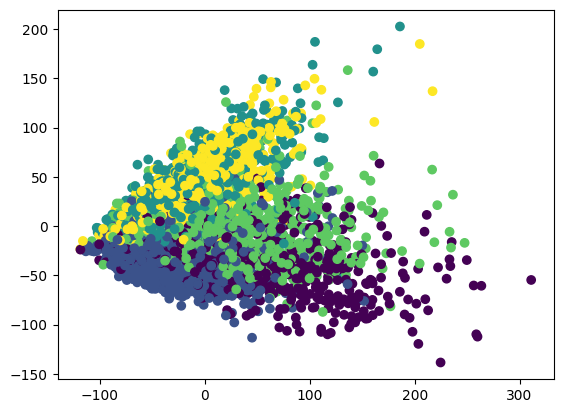

In [ ]:
f_pca = PCA(n_components=2).fit_transform(f_all)
plt.scatter(*f_pca.T, c=y_all)

In [ ]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None

    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))

    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))

    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded

    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self

    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

100%|██████████| 100/100 [00:19<00:00,  5.11it/s]


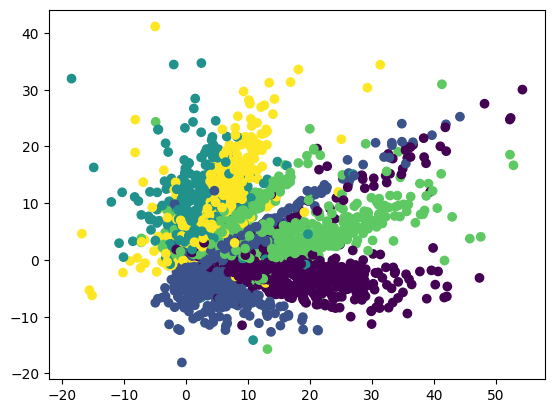

In [ ]:
X_em =Autoencoder(2).fit_transform(f_all)
plt.scatter(*X_em.T, c=y_all)

##Q23

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
f_all_2d = tsne.fit_transform(f_all)

In [ ]:
print(f_all_2d.shape)

(3670, 2)


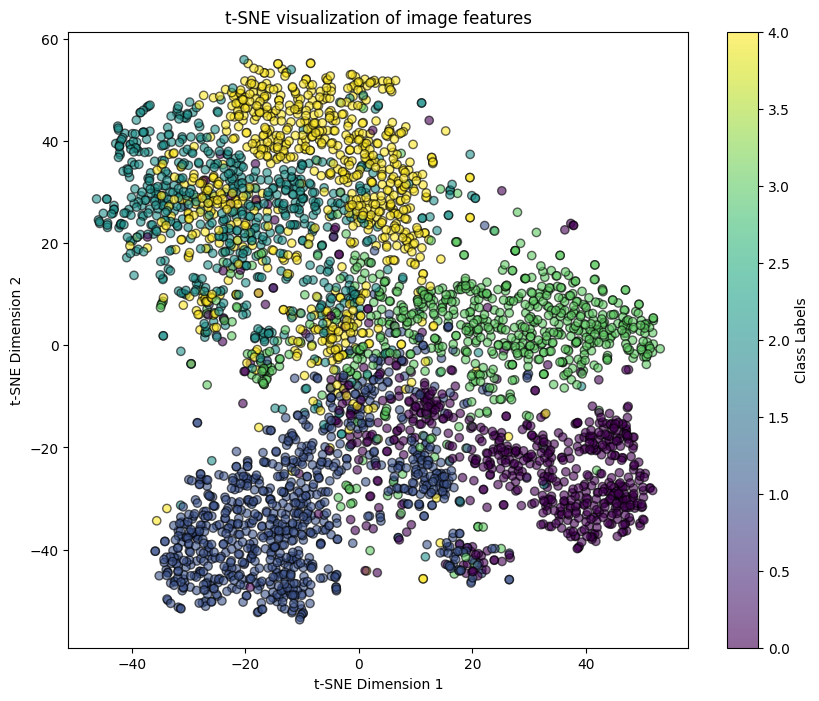

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(f_all_2d[:, 0], f_all_2d[:, 1], c=y_all, cmap='viridis', alpha=0.6, edgecolor='k')

# Create a color bar
plt.colorbar(scatter, label='Class Labels')


plt.title('t-SNE visualization of image features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

##Q24

In [ ]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import make_scorer


In [ ]:
class AgglomerativeClusteringWrapper():
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters

    def fit(self, X, y=None):
        # Initialize the model within fit to ensure parameters are correctly reset each time
        self.model = AgglomerativeClustering(n_clusters=self.n_clusters)
        self.model.fit(X)
        self.labels_ = self.model.labels_  # Store labels to ensure predict returns consistent results
        return self

    def predict(self, X):
        # Return the stored labels. Note: This doesn't adhere to the typical use of predict
        # and assumes predict is called on the data used in fit.
        # For actual new data, AgglomerativeClustering doesn't support prediction.
        return self.labels_

In [ ]:
class HDBSCANWrapper():
    def __init__(self, min_cluster_size=50, min_samples=20):
        self.min_cluster_size = min_cluster_size
        self.min_samples = min_samples

    def fit(self, X, y=None):
        # Initialize the model within fit to ensure parameters are correctly reset each time
        self.model = hdbscan.HDBSCAN(min_cluster_size=self.min_cluster_size,
                                     min_samples=self.min_samples)
        self.model.fit(X)
        self.labels_ = self.model.labels_  # Store labels to ensure predict returns consistent results
        return self

    def predict(self, X):
        return self.labels_


In [ ]:
AG_clustering_5 = AgglomerativeClusteringWrapper()
HD_clustering = HDBSCANWrapper()

None and SVD

In [ ]:
pipe = Pipeline([
    ('dim_reduction', None),
    ('clustering', None)
])

# Define the parameter grid
param_grid1 = {
    'dim_reduction':[None,TruncatedSVD(n_components=50)],
    'clustering': [AgglomerativeClusteringWrapper()]
    # Replace best_gamma, penalty, and best_C with the values you've found earlier
}
param_grid2 = {
    'dim_reduction':[None, TruncatedSVD(n_components=50)],
    'clustering': [ KMeans(n_clusters=5)]
    # Replace best_gamma, penalty, and best_C with the values you've found earlier
}
param_grid3 = {
    'dim_reduction':[None,TruncatedSVD(n_components=50)],
    'clustering': [ HDBSCANWrapper()]
    # Replace best_gamma, penalty, and best_C with the values you've found earlier
}


In [ ]:
def custom_scorer(y_pred,y_true):
    # In this example, we assume y_all is defined globally
    return rand_score(y_pred,y_true)


In [ ]:
cv=[(slice(None), slice(None))]


In [ ]:
grid1 = GridSearchCV(pipe,param_grid1,cv = cv,scoring= make_scorer(custom_scorer))
grid1.fit(f_all,y_all)
results1 = pd.DataFrame(grid1.cv_results_)
grid2 = GridSearchCV(pipe,param_grid2,cv = cv,scoring= make_scorer(custom_scorer))
grid2.fit(f_all,y_all)
results2 = pd.DataFrame(grid2.cv_results_)
grid3 = GridSearchCV(pipe,param_grid3,cv = cv,scoring= make_scorer(custom_scorer))
grid3.fit(f_all,y_all)
results3 = pd.DataFrame(grid3.cv_results_)
results = pd.concat([results1,results2,results3])
topresults = results.sort_values(by='mean_test_score', ascending=False)
topresults



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       3.406546           0.0         0.103952             0.0   
0      21.934258           0.0         0.003413             0.0   
1       2.624576           0.0         0.115771             0.0   
0      26.262440           0.0         0.035081             0.0   
0     133.452699           0.0         0.001714             0.0   
1       2.386107           0.0         0.071021             0.0   

                                    param_clustering  \
1  <__main__.AgglomerativeClusteringWrapper objec...   
0  <__main__.AgglomerativeClusteringWrapper objec...   
1                               KMeans(n_clusters=5)   
0                               KMeans(n_clusters=5)   
0  <__main__.HDBSCANWrapper object at 0x7e593ff04...   
1  <__main__.HDBSCANWrapper object at 0x7e593ff04...   

             param_dim_reduction  \
1  TruncatedSVD(n_components=50)   
0                           None   
1  TruncatedSVD(n_components=50)   
0                           None   
0                           None   
1  TruncatedSVD(n_components=50)   

                                              params  split0_test_score  \
1  {'clustering': <__main__.AgglomerativeClusteri...           0.760723   
0  {'clustering': <__main__.AgglomerativeClusteri...           0.710441   
1  {'clustering': KMeans(n_clusters=5), 'dim_redu...           0.707881   
0  {'clustering': KMeans(n_clusters=5), 'dim_redu...           0.702951   
0  {'clustering': <__main__.HDBSCANWrapper object...           0.203584   
1  {'clustering': <__main__.HDBSCANWrapper object...           0.203584   

   mean_test_score  std_test_score  rank_test_score  
1         0.760723             0.0                1  
0         0.710441             0.0                2  
1         0.707881             0.0                1  
0         0.702951             0.0                2  
0         0.203584             0.0                1  
1         0.203584             0.0                1

Autoencoder

In [ ]:
f_all_reduced_auto = Autoencoder(50).fit_transform(f_all)

100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(f_all_reduced_auto)
kclusterauto = kmeans.predict(f_all_reduced_auto)
print(rand_score(kclusterauto,y_all))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7081619846077638


In [ ]:
agc = AgglomerativeClustering(n_clusters=5)
agcclusterauto = agc.fit_predict(f_all_reduced_auto)
print(rand_score(y_all,agcclusterauto))


0.6718830647527001


In [ ]:
hdc = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=20)
hdclusterauto = hdc.fit_predict(f_all_reduced_auto)
print(rand_score(hdclusterauto,y_all))


0.20358404572368982


UMAP

In [ ]:
f_all_reduced_umap = umap.UMAP(n_components=50, metric='cosine').fit_transform(f_all)

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(f_all_reduced_umap)
kclusterauto = kmeans.predict(f_all_reduced_umap)
print(rand_score(kclusterauto,y_all))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8226335532330306


In [ ]:
agc = AgglomerativeClusteringWrapper()
agc.fit(f_all_reduced_umap)
agcclusterauto =agc.predict(f_all_reduced_umap)
print(rand_score(y_all,agcclusterauto))



0.8236013792560543


In [ ]:
hdc = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=2)
hdclusterauto = hdc.fit_predict(f_all_reduced_umap)
print(rand_score(y_all,hdclusterauto))

0.4288583262224262


Combine all, UMAP + Agglomerative Clustering produce the best results, the adjusted rand score is 0.8236013792560543


##Q25

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True),
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()


    def forward(self, X):
        return self.model(X)

    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()

        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                optimizer.zero_grad()  # Zero the gradients
                clusters = self.forward(X_)
                loss = criterion(clusters,y_)
                loss.backward()  # Backpropagate the gradients
                optimizer.step()

        return self

    def eval(self, X_test, y_test):
        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test, dtype=torch.int64, device='cuda')
        self.model.eval()  # Set the model to evaluation mode

        correct = 0
        total = 0

        with torch.no_grad():  # Disable gradient tracking during evaluation
            clusters = self.forward(X_test)
            _, predicted = torch.max(clusters.data, 1)
            total += y_test.size(0)
            correct += (predicted == y_test).sum().item()
        accuracy = correct / total
        return accuracy


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(f_all,y_all,test_size=0.2, random_state=42)
print(X_train.shape)

(2936, 4096)


In [ ]:
mlp_1 = MLP(4096)


In [ ]:

# Train the model
mlp_1.train(X_train, y_train)

100%|██████████| 100/100 [00:07<00:00, 13.07it/s]


MLP(
  (model): Sequential(
    (0): Linear(in_features=4096, out_features=1280, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1280, out_features=640, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=640, out_features=5, bias=True)
    (5): LogSoftmax(dim=1)
  )
)

In [ ]:
mlp_1.eval(X_test,y_test)

0.9114441416893733

In [ ]:
umap = umap.UMAP(n_components = 50, metric= 'cosine')

In [ ]:
X_train_reduced = umap.fit_transform(X_train)

In [ ]:
x_test_reduced = umap.transform(X_test)

In [ ]:
mlp_2 = MLP(50)

In [ ]:
mlp_2.train(X_train_reduced, y_train)

100%|██████████| 100/100 [00:11<00:00,  8.62it/s]


MLP(
  (model): Sequential(
    (0): Linear(in_features=50, out_features=1280, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1280, out_features=640, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=640, out_features=5, bias=True)
    (5): LogSoftmax(dim=1)
  )
)

In [ ]:
mlp_2.eval(x_test_reduced,y_test)

0.8419618528610354

The accuracy suffers from dimension reduction representation as it drop from 0.91 to 0.84. It is not that significant as 0.84 is also very accurate. it makes sense because the result is quite close to the best result obtained from the Q24, which proves we can produce fairly accurate clusters of images using extracted features.

# PART3

In [ ]:
!pip install datasets transformers numpy pandas Pillow matplotlib
!pip install torch tqdm scipy
!pip install git+https://github.com/openai/CLIP.git
!pip install plotly umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-v_qkm6dc
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-v_qkm6dc
  Resolved https://github.com/openai/CLIP.git 

In [ ]:
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import clip
import torch
from tqdm import tqdm
from scipy.special import softmax
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import matplotlib.image as mpimg


In [ ]:
# load csv file and image paths to construct pokedex, use type_to_load=None to load all types, else use a list of types 1 to load
def construct_pokedex(csv_path='Pokemon.csv', image_dir='./images/', type_to_load=None):
    pokedex = pd.read_csv(csv_path)
    image_paths = []

    for pokemon_name in pokedex["Name"]:
        imgs = glob(f"{image_dir}/{pokemon_name}/0.jpg")
        if len(imgs) > 0:
            image_paths.append(imgs[0])
        else:
            image_paths.append(None)

    pokedex["image_path"] = image_paths
    pokedex = pokedex[pokedex["image_path"].notna()].reset_index(drop=True)

    # only keep pokemon with distinct id
    ids, id_counts = np.unique(pokedex["ID"], return_counts=True)
    ids, id_counts = np.array(ids), np.array(id_counts)
    keep_ids = ids[id_counts == 1]

    pokedex = pokedex[pokedex["ID"].isin(keep_ids)].reset_index(drop=True)
    pokedex["Type2"] = pokedex["Type2"].str.strip()
    if type_to_load is not None:
        pokedex = pokedex[pokedex["Type1"].isin(type_to_load)].reset_index(drop=True)
    return pokedex

# load clip model
def load_clip_model():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-L/14", device=device)
    return model, preprocess, device

# inference clip model on a list of image path
def clip_inference_image(model, preprocess, image_paths, device):
    image_embeddings = []
    with torch.no_grad():
        for img_path in tqdm(image_paths):
            img = Image.open(img_path)
            img_preprocessed = preprocess(img).unsqueeze(0).to(device)
            image_embedding = model.encode_image(img_preprocessed).detach().cpu().numpy()
            image_embeddings += [image_embedding]

    image_embeddings = np.concatenate(image_embeddings, axis=0)
    image_embeddings /= np.linalg.norm(image_embeddings, axis=-1, keepdims=True)
    return image_embeddings

# inference clip model on a list of texts
def clip_inference_text(model, preprocess, texts, device):
    with torch.no_grad():
        text_embeddings = model.encode_text(clip.tokenize(texts).to(device)).detach().cpu().numpy()
    text_embeddings /= np.linalg.norm(text_embeddings, axis=-1, keepdims=True)
    return text_embeddings

# compute similarity of iamges to each text
def compute_similarity_image_to_text(image_embeddings, text_embeddings):
    similarity = softmax((100.0 * image_embeddings @ text_embeddings.T), axis=-1)
    return similarity

# compute similarity of texts to each image
def compute_similarity_text_to_image(image_embeddings, text_embeddings):
    similarity = softmax((100.0 * image_embeddings @ text_embeddings.T), axis=0)
    return similarity

# Use TSNE to project CLIP embeddings to 2D space
def umap_projection(image_embeddings, n_neighbors=15, min_dist=0.1, metric='cosine'):
    distance_matrix = np.zeros((image_embeddings.shape[0], image_embeddings.shape[0]))
    for i in range(image_embeddings.shape[0]):
        for j in range(image_embeddings.shape[0]):
            if i == j:
                distance_matrix[i, j] = 1
            else:
                distance_matrix[i, j] = np.dot(image_embeddings[i], image_embeddings[j])
    distance_matrix = 1 - distance_matrix
    reducer = TSNE(n_components=2, metric="precomputed", init="random", random_state=42)
    visualization_data = reducer.fit_transform(distance_matrix)
    return visualization_data

## Q26

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pokedex = construct_pokedex(csv_path='/content/drive/MyDrive/ECE219/HW2/Pokemon.csv', image_dir='/content/drive/MyDrive/ECE219/HW2/images')
model, preprocess, device = load_clip_model()

image_paths = pokedex['image_path'].tolist()

# Perform CLIP inference on images
image_embeddings = clip_inference_image(model, preprocess, image_paths, device)




100%|████████████████████████████████████████| 890M/890M [00:09<00:00, 103MiB/s]
100%|██████████| 754/754 [06:08<00:00,  2.04it/s]


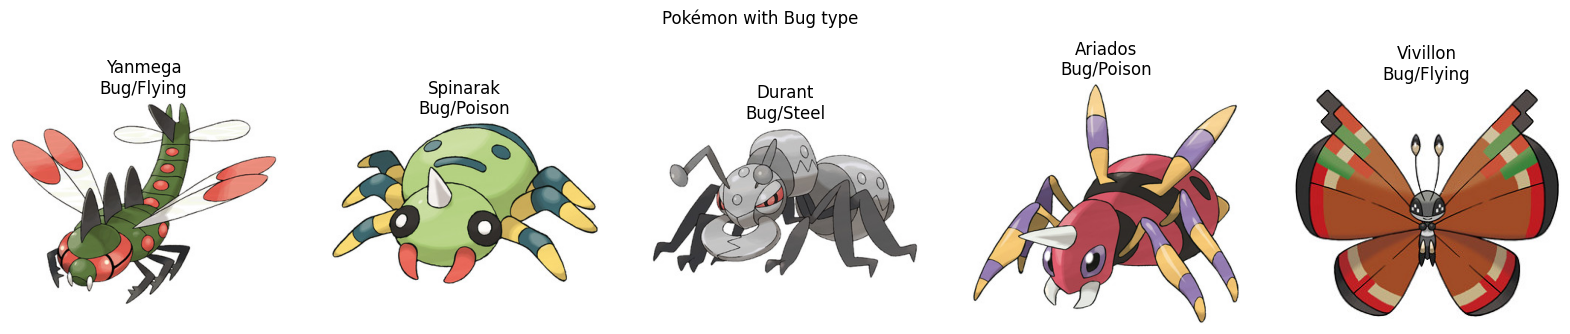

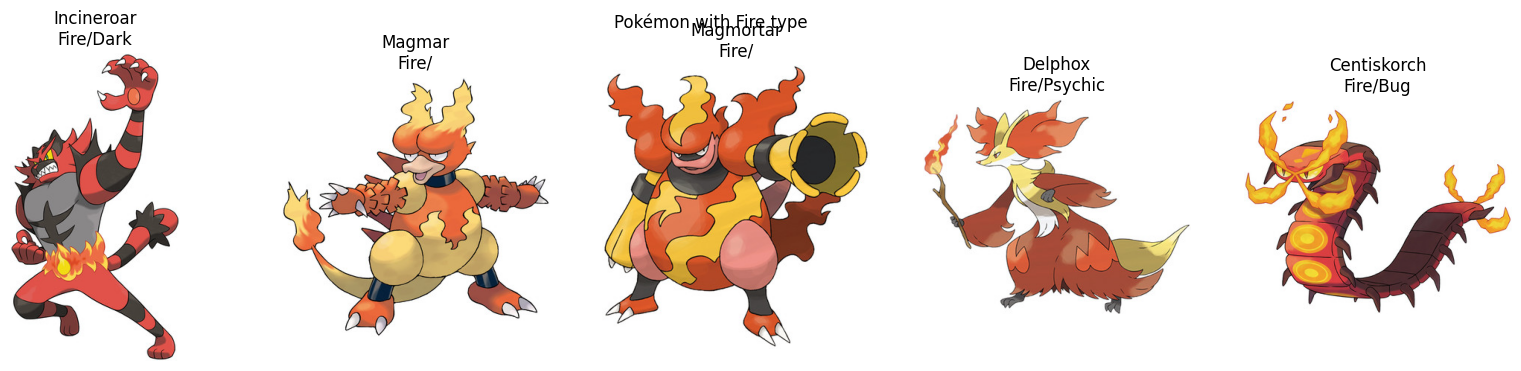

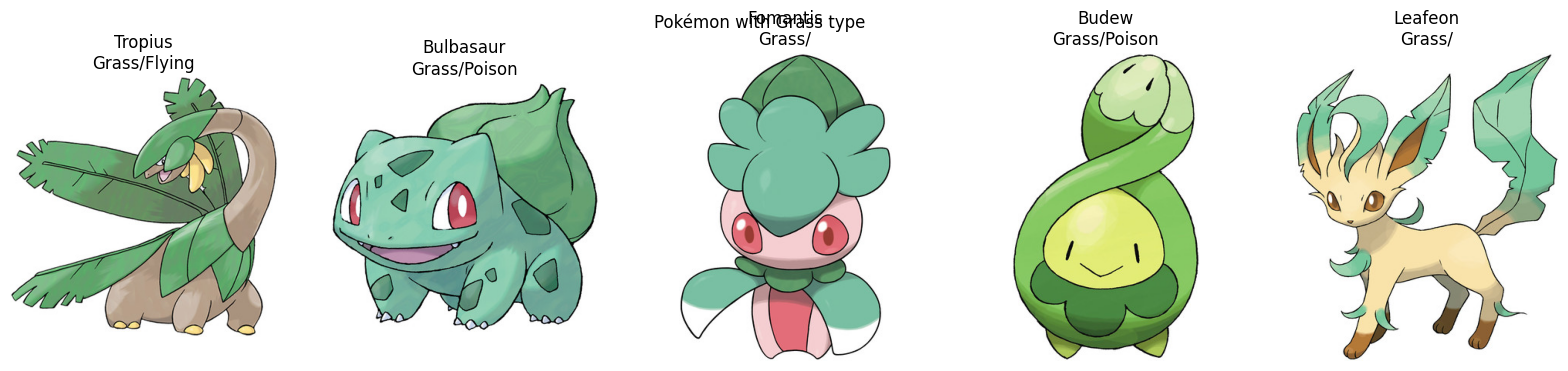

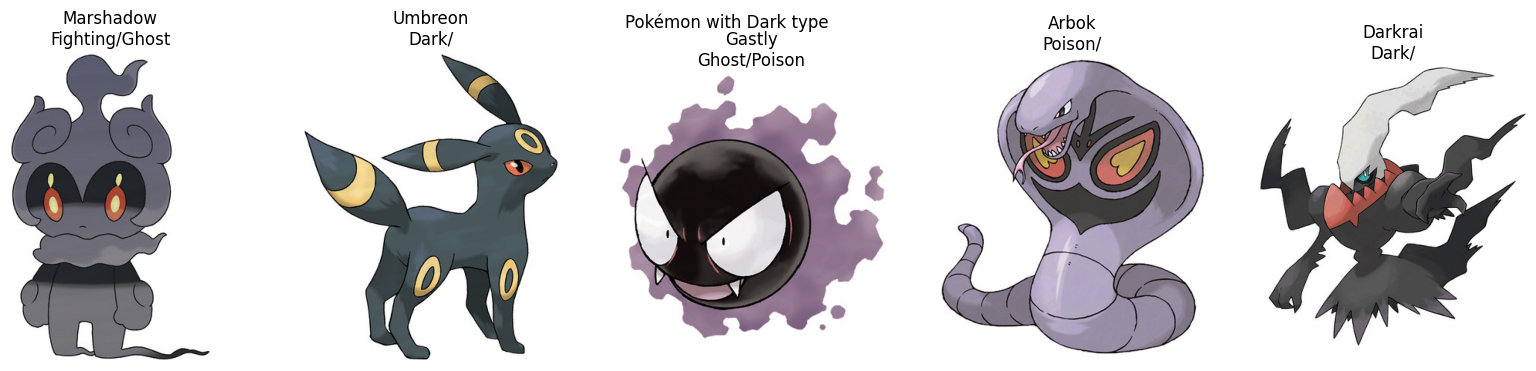

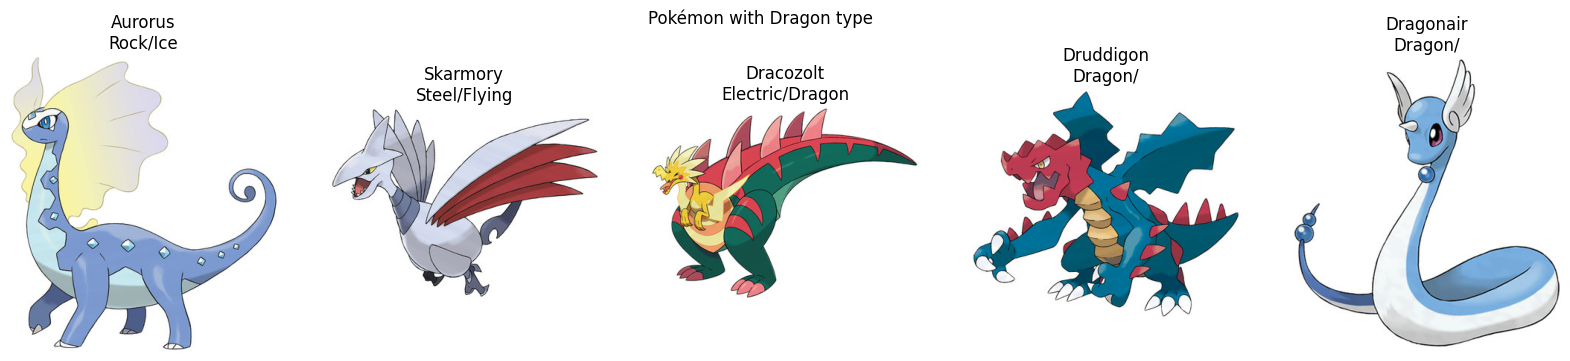

In [ ]:
queries = ["Pokémon with Bug type", "Pokémon with Fire type", "Pokémon with Grass type",
           "Pokémon with Dark type", "Pokémon with Dragon type"]
# Loop through each type query
for query in queries:
    # Perform CLIP
    text_embeddings = clip_inference_text(model, preprocess, query, device)

    # Compute similarity and get top 5 matches
    similarity = compute_similarity_text_to_image(image_embeddings, text_embeddings)
    top_indices = np.argsort(similarity[:, 0])[::-1][:5]

    plt.figure(figsize=(20, 4))
    plt.suptitle(query)
    for i, idx in enumerate(top_indices):
        img = Image.open(image_paths[idx])
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(f"{pokedex.iloc[idx]['Name']}\n{pokedex.iloc[idx]['Type1']}/{pokedex.iloc[idx]['Type2']}")
        plt.axis('off')
    plt.show()

Query format: Pokémon with {typename} type

Dark accuracy: 2/5

Dragon accuracy: 3/5

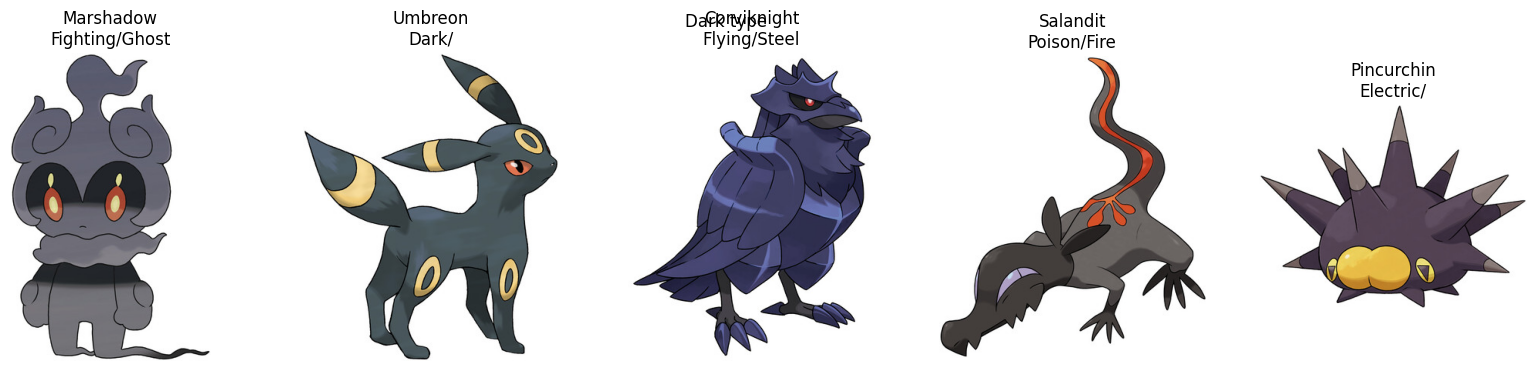

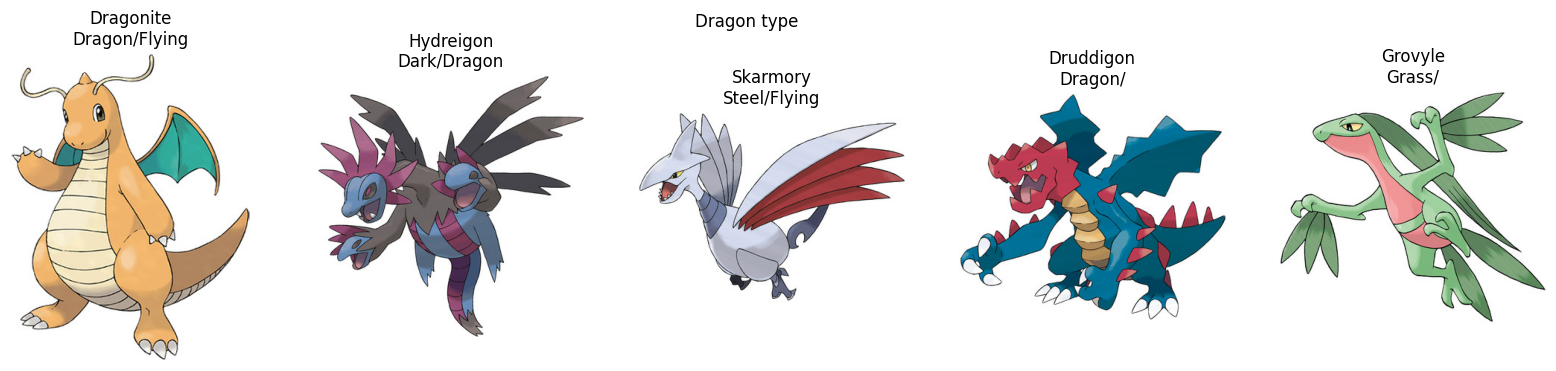

In [ ]:
queries = ["Dark type", "Dragon type"]
# Loop through each type query
for query in queries:
    # Perform CLIP
    text_embeddings = clip_inference_text(model, preprocess, query, device)

    # Compute similarity and get top 5 matches
    similarity = compute_similarity_text_to_image(image_embeddings, text_embeddings)
    top_indices = np.argsort(similarity[:, 0])[::-1][:5]

    plt.figure(figsize=(20, 4))
    plt.suptitle(query)
    for i, idx in enumerate(top_indices):
        img = Image.open(image_paths[idx])
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(f"{pokedex.iloc[idx]['Name']}\n{pokedex.iloc[idx]['Type1']}/{pokedex.iloc[idx]['Type2']}")
        plt.axis('off')
    plt.show()

Query format: {typename} type

Dark accuracy: 1/5

Dragon accuracy: 3/5

Compared to the earlier query structure, the precision for identifying dark type Pokémon has diminished. However, the top five Pokémon identified for the dark type using this query all exhibit notably dark features. Omitting the word "Pokémon" from the query leads CLIP to generate results that prioritize broad visual characteristics over the specific context of Pokémon. It's important to note that within the Pokémon universe, not all Pokémon classified as having a dark or dragon type necessarily embody these attributes visually.

## Q27

In [ ]:
def select_random_images(pokedex, num_images=10):
    np.random.seed(42)

    selected_entries = pokedex.sample(n=num_images).reset_index(drop=True)
    return selected_entries

pokedex = construct_pokedex(csv_path='/content/drive/MyDrive/ECE219/HW2/Pokemon.csv', image_dir='/content/drive/MyDrive/ECE219/HW2/images')
selected_pokemon = select_random_images(pokedex)


100%|██████████| 10/10 [00:00<00:00, 23.46it/s]


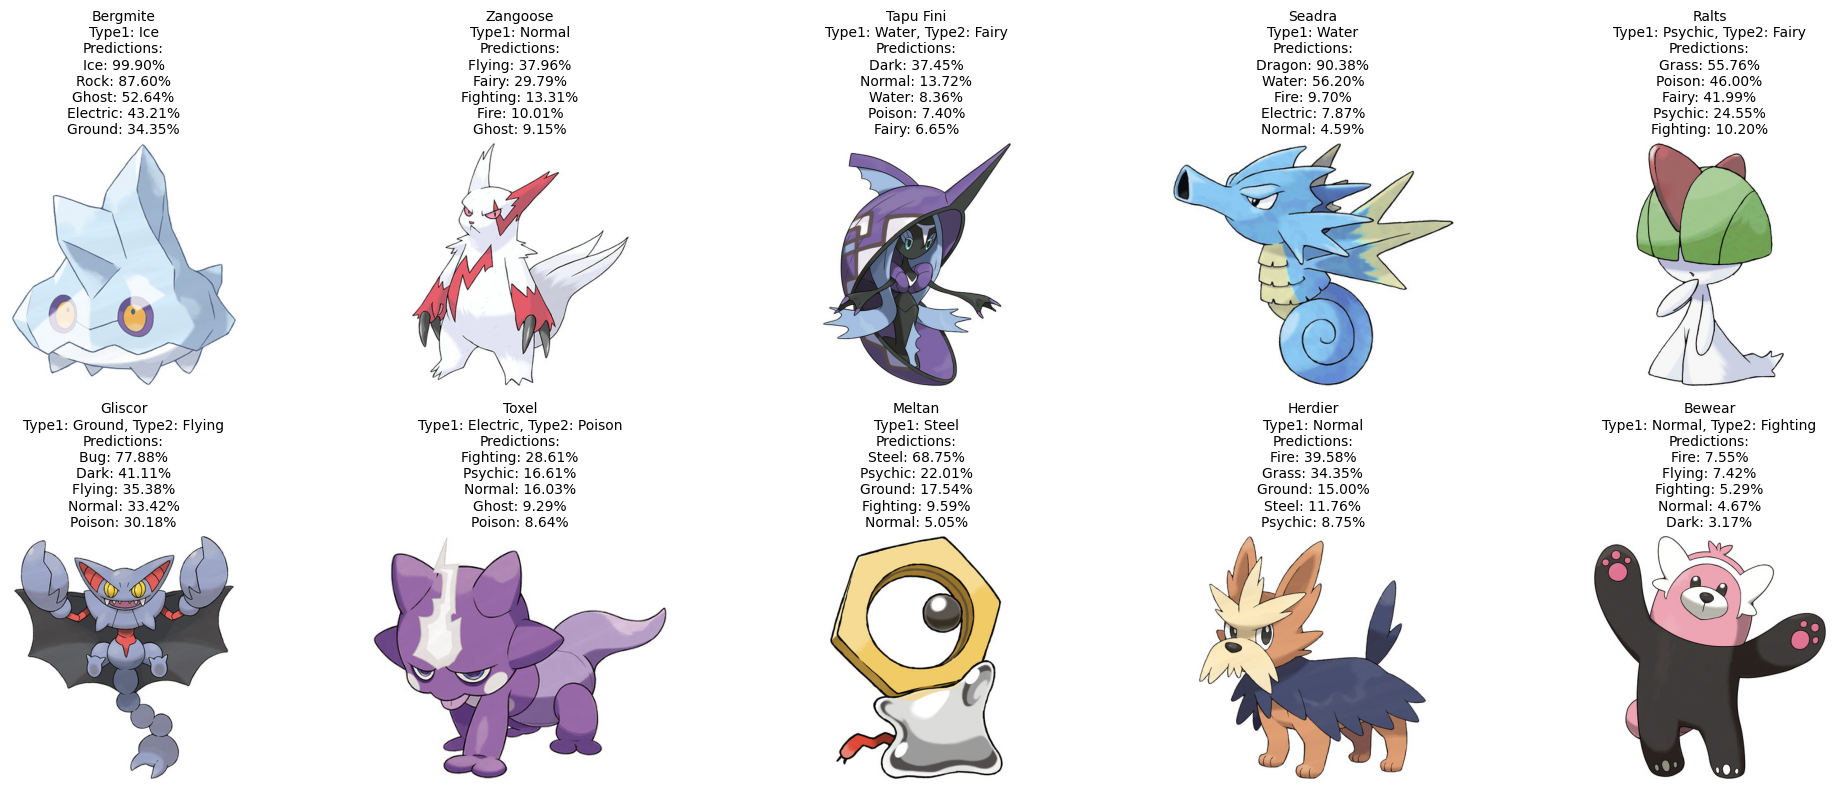

In [ ]:
def get_text_embeddings_for_types(model, preprocess, unique_types, device):
    texts = [f"{type_}" for type_ in unique_types]
    text_embeddings = clip_inference_text(model, preprocess, texts, device)
    return text_embeddings, texts

def plot_selected_pokemon(selected_pokemon, similarities, top_indices_list, pokedex, text_labels):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # Adjust the grid size according to your selection
    axs = axs.flatten()  # Flatten the array to easily iterate over it

    for ax, (index, row), top_indices in zip(axs, selected_pokemon.iterrows(), top_indices_list):
        img_path = row['image_path']
        img = mpimg.imread(img_path)
        ax.imshow(img)

        title = f"{row['Name']}\nType1: {row['Type1']}"
        if pd.notnull(row['Type2']) and row['Type2'] != "":
            title += f", Type2: {row['Type2']}"

        predictions = "\n".join([f"{text_labels[i]}: {similarities[index, i]*100:.2f}%" for i in top_indices])
        title += "\nPredictions:\n" + predictions

        ax.set_title(title, fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


unique_types = pd.unique(pokedex[['Type1']].values.ravel('K'))
text_embeddings, text_labels = get_text_embeddings_for_types(model, preprocess, unique_types, device)

image_paths = selected_pokemon['image_path'].tolist()
image_embeddings = clip_inference_image(model, preprocess, image_paths, device)

similarities = compute_similarity_image_to_text(image_embeddings, text_embeddings)

# Find top 5 predictions for each Pokémon based on similarities
top_indices_list = [np.argsort(similarities[i])[::-1][:5] for i in range(similarities.shape[0])]

plot_selected_pokemon(selected_pokemon, similarities, top_indices_list, pokedex, text_labels)

## Q28

In [ ]:
filtered_pokedex = pokedex[pokedex['Type1'].isin(['Bug', 'Fire', 'Grass'])]
image_paths = filtered_pokedex['image_path'].tolist()
image_embeddings = clip_inference_image(model, preprocess, image_paths, device)

100%|██████████| 192/192 [00:04<00:00, 41.52it/s]


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(image_embeddings)

In [ ]:
import plotly.express as px

tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['Type1'] = filtered_pokedex['Type1'].values
tsne_df['Name'] = filtered_pokedex['Name'].values
tsne_df['Types'] = filtered_pokedex['Type1'].astype(str) + ", " + filtered_pokedex['Type2'].fillna('')

fig = px.scatter(tsne_df, x='x', y='y',
                 color='Type1',
                 hover_data=['Name', 'Types'],
                 title="t-SNE Visualization of Pokémon Types (Bug, Fire, Grass)")

fig.show()



The t-SNE visualization shows Pokémon images color-coded by their primary type—Grass (blue), Fire (red), and Bug (green). There is some clustering by type with Bug and Grass types showing overlap, suggesting visual similarities. Fire type Pokémon are more dispersed, indicating distinct visual features. While CLIP does group images by type to a certain extent, the clusters are not sharply defined, reflecting the complex and varied designs within Pokémon types.